# Credit Risk Prediction

### Created By : Muhammad Haikal Revansa

## Business Problem Understanding

**Context**  
Sebuah perusahaan yang bergerak di bidang pinjaman peer-to-peer LendingClub ingin mengelompokkan risiko kredit pelanggan yang mengajukan pinjaman. Banyak pelanggan mendaftar untuk mendapatkan pinjaman dengan berbagai kebutuhan finansial. Perusahaan ingin mengetahui pelanggan mana yang memiliki risiko gagal bayar (default) agar dapat membantu dalam pengelolaan risiko, penyusunan kebijakan, dan pengoptimalan portofolio pinjaman.

Target :

0 : Tidak berisiko gagal bayar

1 : Berisiko gagal bayar

**Problem Statement**

Proses penilaian risiko kredit bisa memakan waktu dan sumber daya jika perusahaan harus meninjau semua aplikasi pinjaman secara manual. LendingClub ingin meningkatkan efisiensi proses persetujuan pinjaman dengan mengidentifikasi pelanggan yang memiliki risiko gagal bayar (default).
Jika perusahaan memberikan pinjaman kepada pelanggan yang berisiko tinggi tanpa prediksi yang akurat, maka risiko kerugian finansial akan meningkat, memengaruhi profitabilitas perusahaan.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan pelanggan gagal bayar berdasarkan data historis dan demografis mereka.
Selain itu, perusahaan ingin memahami faktor-faktor apa saja yang berkontribusi pada risiko gagal bayar, sehingga dapat digunakan untuk menyusun kebijakan risiko kredit yang lebih efektif.

**Analytic Approach**

Langkah yang akan dilakukan adalah:

Menganalisis data pelanggan untuk menemukan pola yang membedakan pelanggan dengan risiko gagal bayar dan tidak gagal bayar.
Membuat model klasifikasi untuk memprediksi risiko gagal bayar berdasarkan data pelanggan, sehingga LendingClub dapat menentukan apakah pinjaman disetujui atau ditolak.

**Metric Evaluation**

Evaluasi metrik yang digunakan meliputi Accuracy, ROC-AUC, Precision, Recall, dan F1-Score. Accuracy mengukur proporsi prediksi yang benar, sementara ROC-AUC mengevaluasi kemampuan model dalam membedakan kelas positif dan negatif, dengan nilai mendekati 1 menunjukkan performa yang baik. Precision digunakan untuk mengurangi False Positive, sedangkan Recall berfokus pada meminimalkan False Negative. F1-Score adalah kombinasi harmonis antara Precision dan Recall, yang cocok untuk menangani dataset tidak seimbang. Metrik utama yang diprioritaskan adalah Recall, karena tujuan utama adalah memastikan model dapat mengidentifikasi sebanyak mungkin pelanggan berisiko tinggi pada dataset yang tidak seimbang.

- Type 1 Error: False Positive

    Definisi: Model memprediksi pelanggan akan melunasi pinjaman (tidak gagal bayar), tetapi kenyataannya pelanggan gagal bayar.
    Konsekuensi: Perusahaan mengalami kerugian finansial karena memberikan pinjaman kepada pelanggan berisiko tinggi.

- Type 2 Error: False Negative

    Definisi: Model memprediksi pelanggan akan gagal bayar, tetapi kenyataannya pelanggan melunasi pinjaman.
    Konsekuensi: Perusahaan kehilangan kesempatan memberikan pinjaman kepada pelanggan yang layak, sehingga potensi pendapatan hilang.

Note : 
- Dataset tidak seimbang
- Setiap baris data merepresentasikan domografi peminjam yang mendukung proses prediksi

**Attributes Information**

| **Nama Kolom** | **Tipe Data** | **Penjelasan Kolom** |
| --- | --- | --- |
| id                         | int64        | ID unik yang ditetapkan oleh LendingClub untuk daftar pinjaman.                                      |
| member_id                  | int64        | ID unik yang ditetapkan oleh LendingClub untuk anggota peminjam.                                     |
| loan_amnt                  | int64        | Jumlah pinjaman yang diminta.                                                                        |
| funded_amnt                | int64        | Jumlah total yang didanai untuk pinjaman.                                                            |
| funded_amnt_inv            | float64      | Jumlah total yang didanai oleh investor untuk pinjaman tersebut.                                     |
| term                       | object       | Jumlah pembayaran pinjaman dalam bulan (36 atau 60).                                                 |
| int_rate                   | float64      | Tingkat bunga pinjaman dalam persen.                                                                 |
| installment                | float64      | Pembayaran bulanan yang harus dilakukan peminjam jika pinjaman disetujui.                            |
| grade                      | object       | Tingkat pinjaman yang ditetapkan oleh LendingClub.                                                   |
| sub_grade                  | object       | Sub-tingkat pinjaman yang lebih spesifik.                                                            |
| emp_title                  | object       | Jabatan pekerjaan yang diberikan oleh peminjam saat mengajukan pinjaman.                             |
| emp_length                 | object       | Lama masa kerja peminjam (0-10 tahun).                                                               |
| home_ownership             | object       | Status kepemilikan rumah peminjam (Rent, Own, Mortgage).                                             |
| annual_inc                 | float64      | Pendapatan tahunan yang dilaporkan oleh peminjam.                                                    |
| verification_status        | object       | Status verifikasi pendapatan (Verified, Source Verified, Not Verified).                              |
| issue_d                    | object       | Bulan ketika pinjaman tersebut didanai.                                                              |
| loan_status                | object       | Status pinjaman saat ini.                                         |
| pymnt_plan                 | object       | Menunjukkan apakah rencana pembayaran diterapkan pada pinjaman.                                      |
| url                        | object       | URL untuk halaman LendingClub dengan data daftar pinjaman.                                           |
| desc                       | object       | Deskripsi pinjaman yang diberikan oleh peminjam.                                                     |
| purpose                    | object       | Tujuan peminjaman uang (Debt Consolidation, Credit Card, dll).                                       |
| title                      | object       | Judul pinjaman yang diberikan oleh peminjam.                                                         |
| zip_code                   | object       | 3 digit pertama dari kode pos peminjam.                                                              |
| addr_state                 | object       | Negara bagian peminjam yang diberikan dalam aplikasi pinjaman.                                       |
| dti                        | float64      | Rasio utang terhadap pendapatan peminjam.                                                            |
| delinq_2yrs                | float64      | Jumlah insiden keterlambatan lebih dari 30 hari dalam 2 tahun terakhir.                              |
| earliest_cr_line           | object       | Bulan saat batas kredit pertama peminjam dibuka.                                                     |
| inq_last_6mths             | float64      | Jumlah permintaan kredit dalam 6 bulan terakhir.                                                     |
| mths_since_last_delinq     | float64      | Jumlah bulan sejak keterlambatan terakhir peminjam.                                                  |
| mths_since_last_record     | float64      | Jumlah bulan sejak catatan publik terakhir peminjam.                                                 |
| open_acc                   | float64      | Jumlah jalur kredit terbuka dalam file kredit peminjam.                                              |
| revol_bal                  | float64      | Total saldo kredit bergulir.                                                                         |
| revol_util                 | float64      | Tingkat pemanfaatan jalur kredit bergulir dalam persen.                                              |
| total_acc                  | float64      | Jumlah total batas kredit yang ada dalam file kredit peminjam.                                       |
| initial_list_status        | object       | Status pencatatan awal pinjaman (Whole, Fractional).                                                 |
| out_prncp                  | float64      | Sisa pokok terutang untuk total jumlah yang didanai.                                                 |
| total_pymnt                | float64      | Pembayaran yang diterima sampai saat ini untuk total jumlah yang didanai.                            |
| total_rec_prncp            | float64      | Pokok yang diterima sampai saat ini.                                                                 |
| total_rec_int              | float64      | Bunga yang diterima sampai saat ini.                                                                 |
| total_rec_late_fee         | float64      | Biaya keterlambatan yang diterima sampai saat ini.                                                   |
| recoveries                 | float64      | Total jumlah pemulihan pinjaman.                                                                     |
| collection_recovery_fee    | float64      | Biaya pengumpulan setelah gagal bayar.                                                               |
| last_pymnt_d               | object       | Bulan pembayaran terakhir diterima.                                                                 |
| last_pymnt_amnt            | float64      | Jumlah pembayaran terakhir yang diterima.                                                            |
| next_pymnt_d               | object       | Tanggal pembayaran berikutnya dijadwalkan.                                                           |
| collections_12_mths_ex_med | float64      | Jumlah koleksi dalam 12 bulan terakhir, tidak termasuk koleksi medis.                                |
| mths_since_last_major_derog| float64      | Bulan sejak catatan buruk besar terakhir (90+ hari).                                                 |
| policy_code                | int64        | Kode kebijakan LendingClub (1 = tersedia untuk umum).                                                |
| application_type           | object       | Jenis aplikasi (individu atau bersama).                                                             |
| annual_inc_joint           | float64      | Gabungan pendapatan tahunan dari peminjam bersama.                                                   |
| dti_joint                  | float64      | Rasio utang terhadap pendapatan untuk peminjam bersama.                                              |
| verification_status_joint  | object       | Status verifikasi pendapatan gabungan peminjam bersama.                                              |
| acc_now_delinq             | float64      | Jumlah akun yang saat ini menunggak.                                                                 |
| tot_coll_amt               | float64      | Total jumlah penagihan yang terutang.                                                                |
| tot_cur_bal                | float64      | Total saldo saat ini dari semua akun.                                                                |
| open_acc_6m                | float64      | Jumlah perdagangan terbuka dalam 6 bulan terakhir.                                                   |
| open_il_6m                 | float64      | Jumlah akun angsuran yang dibuka dalam 6 bulan terakhir.                                              |
| open_il_12m                | float64      | Jumlah akun angsuran yang dibuka dalam 12 bulan terakhir.                                             |
| open_il_24m                | float64      | Jumlah akun angsuran yang dibuka dalam 24 bulan terakhir.                                             |
| mths_since_rcnt_il         | float64      | Bulan sejak akun angsuran terakhir dibuka.                                                           |
| total_bal_il               | float64      | Total saldo saat ini dari semua akun angsuran.                                                       |
| il_util                    | float64      | Rasio saldo saat ini terhadap batas kredit pada semua akun angsuran.                                 |
| open_rv_12m                | float64      | Jumlah perdagangan bergulir yang dibuka dalam 12 bulan terakhir.                                     |
| open_rv_24m                | float64      | Jumlah perdagangan bergulir yang dibuka dalam 24 bulan terakhir.                                     |
| max_bal_bc                 | float64      | Saldo maksimum saat ini pada semua akun bergulir.                                                    |
| all_util                   | float64      | Saldo terhadap batas kredit pada semua akun.                                                         |
| total_rev_hi_lim           | float64      | Total batas kredit bergulir tertinggi.                                                               |
| inq_fi                     | float64      | Jumlah pertanyaan tentang keuangan pribadi.                                                          |
| total_cu_tl                | float64      | Jumlah perdagangan keuangan.                                                                         |
| inq_last_12m               | float64      | Jumlah pertanyaan kredit dalam 12 bulan terakhir.                                                    |


In [55]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## EDA

In [56]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [57]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Dataset ini memiliki total 75 fitur dan 466285 dengan terdapat missing value pada beberapa fitur

In [59]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Analysis Fitur Target**

## Data Cleaning

In [60]:
def summarize_dataset(df):
    summary = []
    for col in df.columns:
        unique_values = df[col].dropna().unique()  # Hapus nilai NaN dan ambil nilai unik
        if len(unique_values) >= 5:
            sample_values = list(pd.Series(unique_values).sample(5, replace=False).values)  # Ambil 5 sampel acak
        else:
            sample_values = list(unique_values)  # Jika nilai unik kurang dari 5, ambil semuanya

        summary.append({
            "Column": col,
            "Data Type": df[col].dtype,
            "Null Count": df[col].isna().sum(),
            "Null Percentage (%)": round((df[col].isna().sum() / len(df)) * 100, 2),
            "Unique Count": df[col].nunique(),
            "Sample Values": sample_values
        })
    
    summary_df = pd.DataFrame(summary)
    return summary_df

# Konfigurasi pandas untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Contoh penggunaan
df_summary = summarize_dataset(df)
df_summary

,Column,Data Type,Null Count,Null Percentage (%),Unique Count,Sample Values
0,Unnamed: 0,int64,0,0.00,466285,"[159803, 322093, 21754, 210082, 275410]"
1,id,int64,0,0.00,466285,"[11637955, 12946087, 9254634, 13035786, 8195283]"
2,member_id,int64,0,0.00,466285,"[10638339, 13127533, 14998255, 35854520, 2629411]"
3,loan_amnt,int64,0,0.00,1352,"[27575, 17100, 14250, 9300, 7750]"
4,funded_amnt,int64,0,0.00,1354,"[4075, 1775, 4375, 13775, 18225]"
5,funded_amnt_inv,float64,0,0.00,9854,"[966.6804145, 29449.4488, 24663.66489, 14921.4..."
6,term,object,0,0.00,2,"[ 36 months, 60 months]"
7,int_rate,float64,0,0.00,506,"[17.44, 8.0, 17.74, 14.84, 25.89]"
8,installment,float64,0,0.00,55622,"[473.86, 363.49, 124.98, 194.95, 726.1]"
9,grade,object,0,0.00,7,"[E, F, D, A, G]"


Terlihat bahwa data yang kita miliki memiliki tipe data sebagian besar numeric, missing value dari setiap fitur pun sangat beragam, ada beberapa fitur yag tidak memiliki data sama sekali. Selanjutnya kita akan menghapus fitur yang tidak relevan dan yang tidak memiliki data.

**Drop Column**

Pertama mari kita hapus yang tidak relevan dan kolom yang tidak memiliki data

In [61]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ["Unnamed: 0", "id", "member_id", "desc", "zip_code", "next_pymnt_d", "policy_code", "application_type", "annual_inc_joint", "dti_joint", "verification_status_joint", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m", "title", "url", "emp_title", 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df_cleaned = df.drop(columns=columns_to_drop)

In [62]:
def summarize_dataset(df_cleaned):
    summary = []
    for col in df_cleaned.columns:
        unique_values = df_cleaned[col].dropna().unique()  # Hapus nilai NaN dan ambil nilai unik
        if len(unique_values) >= 5:
            sample_values = list(pd.Series(unique_values).sample(5, replace=False).values)  # Ambil 5 sampel acak
        else:
            sample_values = list(unique_values)  # Jika nilai unik kurang dari 5, ambil semuanya

        summary.append({
            "Column": col,
            "Data Type": df_cleaned[col].dtype,
            "Null Count": df_cleaned[col].isna().sum(),
            "Null Percentage (%)": round((df_cleaned[col].isna().sum() / len(df_cleaned)) * 100, 2),
            "Unique Count": df_cleaned[col].nunique(),
            "Sample Values": sample_values
        })
    
    summary_df = pd.DataFrame(summary)
    return summary_df

# Konfigurasi pandas untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Contoh penggunaan
df_summary = summarize_dataset(df_cleaned)
df_summary

,Column,Data Type,Null Count,Null Percentage (%),Unique Count,Sample Values
0,loan_amnt,int64,0,0.00,1352,"[28150, 8200, 6650, 15450, 16775]"
1,funded_amnt,int64,0,0.00,1354,"[3775, 21150, 9000, 24300, 34875]"
2,funded_amnt_inv,float64,0,0.00,9854,"[9635.344499, 4399.322537, 11938.32461, 6962.1..."
3,term,object,0,0.00,2,"[ 36 months, 60 months]"
4,int_rate,float64,0,0.00,506,"[14.33, 23.33, 12.42, 18.43, 14.65]"
5,installment,float64,0,0.00,55622,"[370.56, 529.49, 68.77, 144.16, 594.55]"
6,grade,object,0,0.00,7,"[E, A, D, F, G]"
7,sub_grade,object,0,0.00,35,"[G5, F1, D3, A3, F2]"
8,emp_length,object,21008,4.51,11,"[10+ years, < 1 year, 7 years, 2 years, 8 years]"
9,home_ownership,object,0,0.00,6,"[OTHER, MORTGAGE, OWN, NONE, RENT]"


Kolom yang tersisa tinggal 47 kolom setelah kolom yang tidak relevan dan tidak memiliki data kita hapus, fitur emp_title juga saya hapus karena fitur ini memiliki jumlah data unik yang sangat banyak dan berpotensi menyebabkan overfiting. selanjutnya mari kita analisa missing value pada setiap kolom

**Missing Value**

Sebelum masuk ke analisa, saya akan menghapus missing value yang kurang dari 1% agar mempermudah proses analisa

In [63]:
# Daftar kolom yang ingin dihapus missing value dibawah 1%
columns_to_clean = [
    "annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_util", "total_acc", "collections_12_mths_ex_med", "acc_now_delinq"
]

# Hapus baris pada kolom tersebut
df_cleaned = df_cleaned.dropna(subset=columns_to_clean)

Sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

**Bar Plot**

<Axes: >

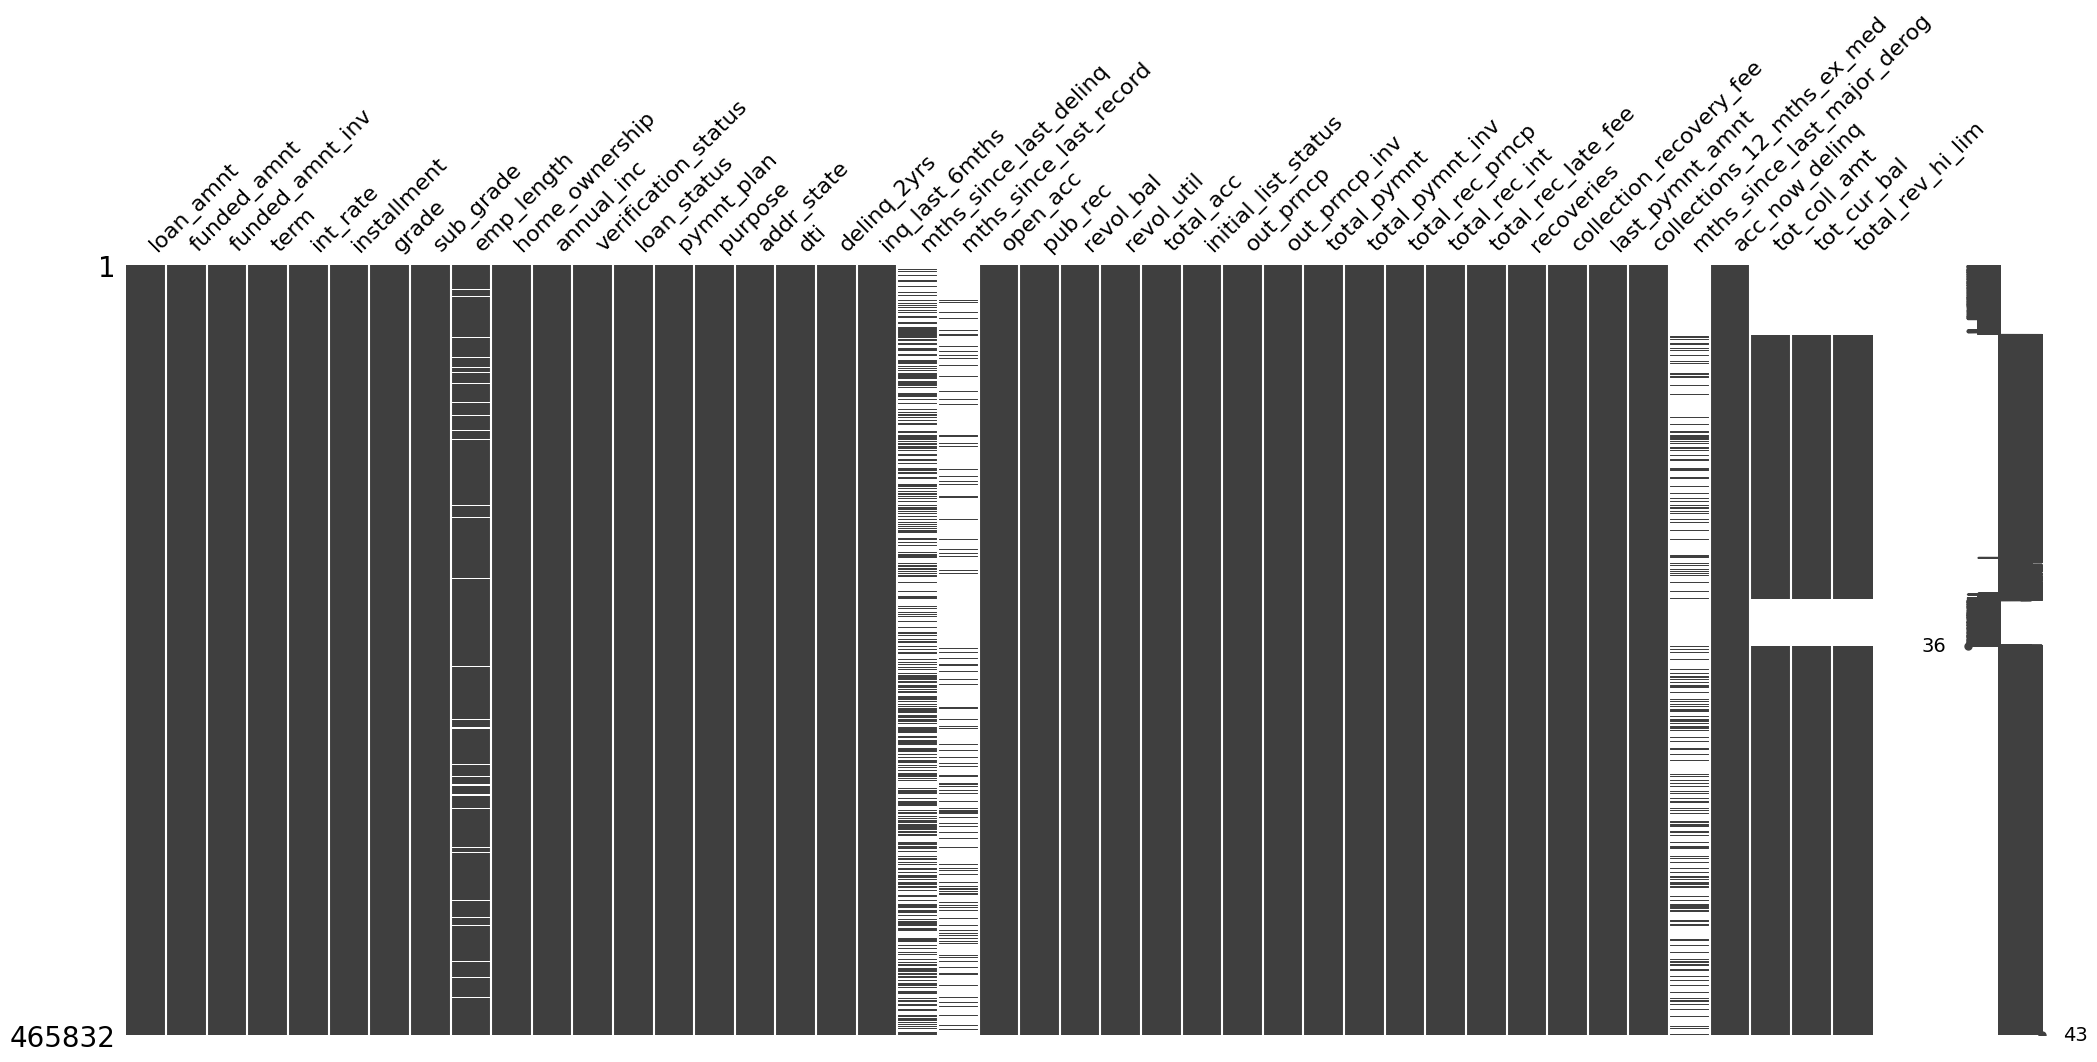

In [64]:
import missingno as msno

# Visualisasi matrix missing value
msno.matrix(df_cleaned)

Terlihat bahwa missing value cukup berpola pada beberapa kolom

**Heat Map**

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

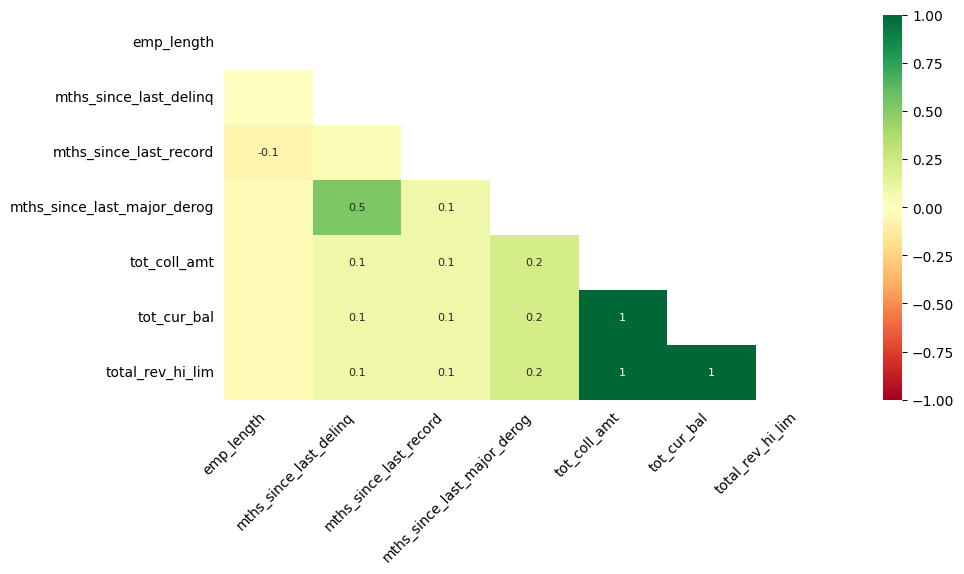

In [65]:
missingno.heatmap(df_cleaned, cmap="RdYlGn", figsize=(10,5), fontsize=10);

Terlihat bahwa fitur tot_coll_amt, tot_cut_bal, total_rev_hi_lim juga memiliki keterkaitan yang sangat kuat dengan nilai 1

Sekarang kita cek korelasi fitur emp_lenght dengan fitur annual_inc

In [66]:
df_cleaned['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

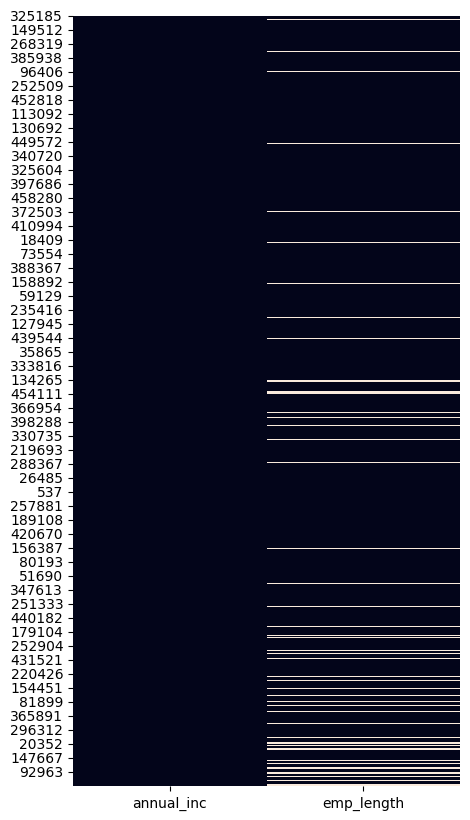

In [67]:
# Subset data yang hanya berisi kolom annual_inc dan emp_length_missing
heatmap_data = df_cleaned[['annual_inc', 'emp_length']]

# Urutkan data berdasarkan annual_inc dari terbesar ke terkecil
heatmap_data_sorted = heatmap_data.sort_values(by='annual_inc', ascending=False)

# Buat heatmap dengan data yang telah diurutkan
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data_sorted.isnull(), cbar=False,)
plt.show()

Bisa di lihat ketika di bandingkan dengan fitur annual_inc, missing value pada emp_lenght cukup berpola, yang dimana missing value terdapat pada peminjam yang memiliki pendapatan tahunan menengah kebawah. Selanjutnya mari kita lihat rentang nilai dari fitur annual_inc untuk mengisi missing value pada fitur emp_length.

In [68]:
df_cleaned['annual_inc'].describe()

count    4.658320e+05
mean     7.326872e+04
std      5.493832e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.884200e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

Berdasarkan statistik deskriptif dari kolom annual_inc, kita dapat membuat rentang penghasilan yang lebih spesifik untuk mengelompokkan data. Berikut adalah rentang yang disarankan berdasarkan kuartil dan nilai minimum serta maksimum

In [69]:
# Membuat rentang penghasilan
bins = [0, 20000, 45000, 63000, 89000, 150000, np.inf]
labels = ['0-20k', '20k-45k', '45k-63k', '63k-89k', '89k-150k', '>150k']
df_cleaned['income_group'] = pd.cut(df_cleaned['annual_inc'], bins=bins, labels=labels)

In [70]:
# Fungsi untuk imputasi emp_length berdasarkan modus kelompok income_group
def impute_emp_length(group):
    mode_value = group['emp_length'].mode()  # Mengambil modus
    if len(mode_value) > 0:
        return group['emp_length'].fillna(mode_value.iloc[0])  # Isi dengan modus
    else:
        return group['emp_length']  # Jika tidak ada modus, biarkan kosong

# Terapkan imputasi berdasarkan kelompok income_group
df_cleaned['emp_length'] = df_cleaned.groupby('income_group').apply(impute_emp_length).reset_index(level=0, drop=True)

# Hapus kolom sementara income_group jika tidak dibutuhkan lagi
df_cleaned.drop(columns=['income_group'], inplace=True)

# Cek jumlah missing value setelah imputasi
print('Sisa missing value',df_cleaned['emp_length'].isnull().sum())


Sisa missing value 0


Kita sudah berhasil mengisi missing value dengan modus atau nilai yang paling banyak muncul di rentang nilai pada fitur annual_inc. Selanjutnya mari kita analisa missing value pada kolom mths_since_last_delinq, mths_since_last_record dan mths_since_last_major_derog

In [71]:
df_cleaned[['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']].describe()

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
count,215665.000000,62521.000000,98895.000000
mean,34.120428,74.419027,42.859235
std,21.775099,30.244365,21.664857
min,0.000000,0.000000,0.000000
25%,16.000000,53.000000,26.000000
50%,31.000000,76.000000,42.000000
75%,49.000000,102.000000,59.000000
max,188.000000,129.000000,188.000000


In [72]:
df_cleaned['loan_status'].value_counts()

loan_status
Current                                                224120
Fully Paid                                             184550
Charged Off                                             42422
Late (31-120 days)                                       6895
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1914
Late (16-30 days)                                        1217
Default                                                   832
Does not meet the credit policy. Status:Charged Off       738
Name: count, dtype: int64

In [73]:
# Hitung proporsi kategori loan_status berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_delinq'].isnull())['loan_status'].value_counts(normalize=True)
analysis

mths_since_last_delinq  loan_status                                        
False                   Current                                                0.504347
                        Fully Paid                                             0.371984
                        Charged Off                                            0.087140
                        Late (31-120 days)                                     0.016646
                        In Grace Period                                        0.007929
                        Does not meet the credit policy. Status:Fully Paid     0.004841
                        Late (16-30 days)                                      0.003158
                        Does not meet the credit policy. Status:Charged Off    0.002073
                        Default                                                0.001883
True                    Current                                                0.461092
                        Fully Paid          

Mayoritas pelanggan ini mungkin tidak memiliki catatan negatif, tetapi ada subset kecil yang berpotensi berisiko

In [74]:
# Hitung proporsi kategori loan_status berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_record'].isnull())['loan_status'].value_counts(normalize=True)
analysis

mths_since_last_record  loan_status                                        
False                   Current                                                0.531549
                        Fully Paid                                             0.343501
                        Charged Off                                            0.081797
                        Late (31-120 days)                                     0.017546
                        Does not meet the credit policy. Status:Fully Paid     0.008477
                        In Grace Period                                        0.007198
                        Does not meet the credit policy. Status:Charged Off    0.004415
                        Late (16-30 days)                                      0.003263
                        Default                                                0.002255
True                    Current                                                0.473300
                        Fully Paid          

Bukti mendukung bahwa mayoritas pelanggan ini tidak memiliki catatan negatif, tetapi risiko kecil tetap ada

In [75]:
# Hitung proporsi kategori loan_status berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_major_derog'].isnull())['loan_status'].value_counts(normalize=True)
analysis

mths_since_last_major_derog  loan_status                                        
False                        Current                                                0.561313
                             Fully Paid                                             0.324010
                             Charged Off                                            0.080328
                             Late (31-120 days)                                     0.019576
                             In Grace Period                                        0.008838
                             Late (16-30 days)                                      0.003772
                             Default                                                0.002164
True                         Current                                                0.459504
                             Fully Paid                                             0.415622
                             Charged Off                                          

Sebagian besar pelanggan ini kemungkinan tidak memiliki catatan derogatory, tetapi ada indikasi risiko untuk subset kecil

In [76]:
# Hitung proporsi kategori open_acc dan total_acc berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_delinq'].isnull())[['open_acc', 'total_acc']].mean()
analysis

,open_acc,total_acc
mths_since_last_delinq,,
False,11.504964,27.397552
True,10.922416,23.064065


In [77]:
# Hitung proporsi kategori open_acc dan total_acc berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_record'].isnull())[['open_acc', 'total_acc']].mean()
analysis

,open_acc,total_acc
mths_since_last_record,,
False,10.677916,25.403432
True,11.271827,25.018690


In [78]:
# Hitung proporsi kategori open_acc dan total_acc berdasarkan missing value
analysis = df_cleaned.groupby(df_cleaned['mths_since_last_major_derog'].isnull())[['open_acc', 'total_acc']].mean()
analysis

,open_acc,total_acc
mths_since_last_major_derog,,
False,11.315860,28.319076
True,11.158766,24.194742


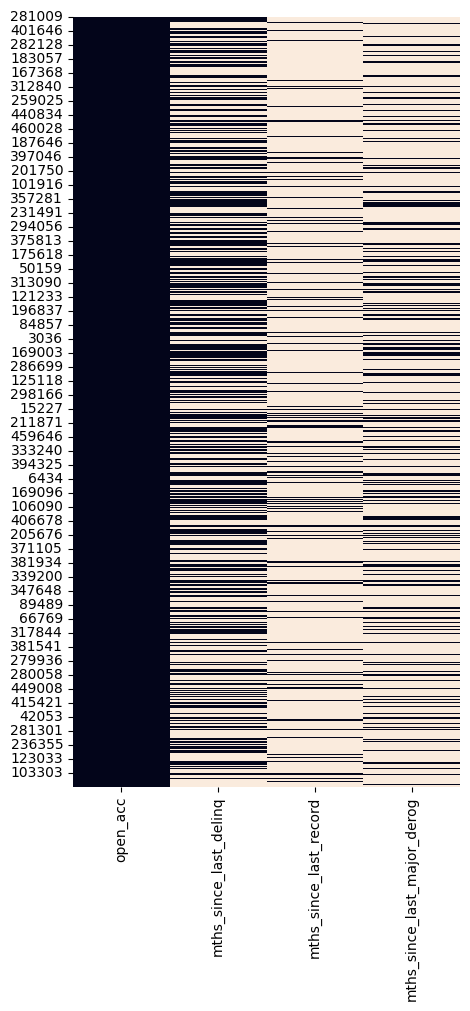

In [79]:
# Subset data yang hanya berisi kolom missing value dan kolom pembanding
heatmap_data = df_cleaned[['open_acc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']]

# Urutkan data berdasarkan open_acc dari terbesar ke terkecil
heatmap_data_sorted = heatmap_data.sort_values(by='open_acc', ascending=False)

# Buat heatmap dengan data yang telah diurutkan
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data_sorted.isnull(), cbar=False,)
plt.show()

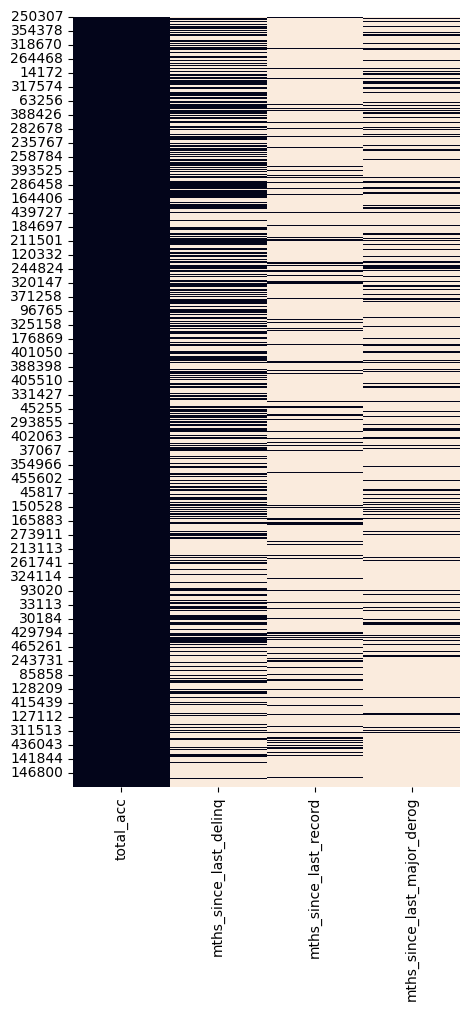

In [80]:
# Subset data yang hanya berisi kolom missing value dan kolom pembanding
heatmap_data = df_cleaned[['total_acc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']]

# Urutkan data berdasarkan total_acc dari terbesar ke terkecil
heatmap_data_sorted = heatmap_data.sort_values(by='total_acc', ascending=False)

# Buat heatmap dengan data yang telah diurutkan
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data_sorted.isnull(), cbar=False,)
plt.show()

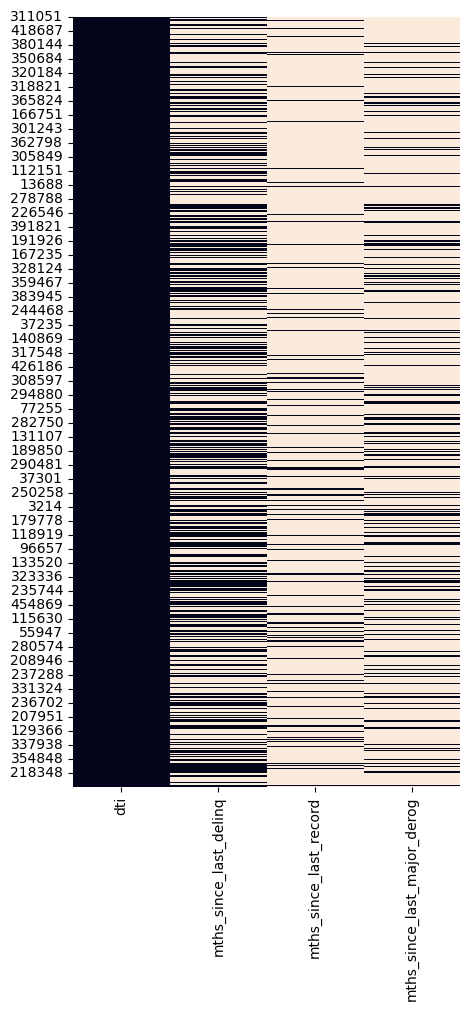

In [81]:
# Subset data yang hanya berisi kolom missing value dan kolom pembanding
heatmap_data = df_cleaned[['dti', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']]

# Urutkan data berdasarkan dti dari terbesar ke terkecil
heatmap_data_sorted = heatmap_data.sort_values(by='dti', ascending=False)

# Buat heatmap dengan data yang telah diurutkan
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data_sorted.isnull(), cbar=False,)
plt.show()

Terlihat bahwa pola missng value cukup acak dan tidak ada penyebab kenapa terjadi missing value jika kita melihat visualisasi di atas

Pelanggan dengan missing value cenderung memiliki lebih sedikit akun kredit (open_acc dan total_acc). Dengan pengamatan di atas, tidak ada cukup bukti bahwa missing value pada fitur mths_since_last_delinq, mths_since_last_record dan mths_since_last_major_derog untuk dikatakan disebabkan oleh tidak adanya catatan negatif pada customer. Sebenarnya ketiga kolom ini cukup penting untuk keperluan prediksi kita, tetapi jika kita mengisi missing value dengan nilai yang tinggi atau menghapus data missing, kemungkinan besar dataset kita akan mengalami bias atau kekurangan informasi karena berkurangnya banyak data. Jadi menurut saya, ketiga fitur ini akan saya hapus karena menimbang missing value yang besar berkisar 50% - 80% missing value.

In [82]:
# Menghapus kolom
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print('Jumlah kolom saat ini ', df_cleaned.shape[1])

Jumlah kolom saat ini  40


Selanjutnya mari kita analysis missing value pada fitur tot_coll_amt, tot_cur_bal dan total_rev_hi_lim

In [83]:
# Proporsi pelanggan dengan open_acc = 0 dan total_acc = 0 berdasarkan missing value
missing_value_analysis = df_cleaned[df_cleaned['tot_coll_amt'].isnull()]
no_credit_accounts = (missing_value_analysis[['open_acc', 'total_acc']] == 0).mean()
print(no_credit_accounts)

open_acc     0.0
total_acc    0.0
dtype: float64


In [84]:
df_cleaned['open_acc'].describe()

count    465832.000000
mean         11.192116
std           4.985235
min           1.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

In [85]:
df_cleaned['total_acc'].describe()

count    465832.000000
mean         25.070328
std          11.598126
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

semua pelanggan dengan missing value pada tot_coll_amt memiliki setidaknya satu akun kredit yang terbuka atau total akun kredit tidak nol. Hal ini menunjukkan bahwa missing value tidak sepenuhnya disebabkan oleh tidak adanya akun kredit aktif

In [86]:
df_cleaned['loan_status'].value_counts()

loan_status
Current                                                224120
Fully Paid                                             184550
Charged Off                                             42422
Late (31-120 days)                                       6895
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1914
Late (16-30 days)                                        1217
Default                                                   832
Does not meet the credit policy. Status:Charged Off       738
Name: count, dtype: int64

In [87]:
# Daftar kolom yang ingin dihapus missing value dibawah 1%
columns_to_clean = [
 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

# Hapus baris pada kolom tersebut
df_cleaned = df_cleaned.dropna(subset=columns_to_clean)

In [88]:
df_cleaned['loan_status'].value_counts()

loan_status
Current               220534
Fully Paid            130966
Charged Off            32433
Late (31-120 days)      6775
In Grace Period         3078
Late (16-30 days)       1190
Default                  814
Name: count, dtype: int64

In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395790 entries, 42535 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   395790 non-null  int64  
 1   funded_amnt                 395790 non-null  int64  
 2   funded_amnt_inv             395790 non-null  float64
 3   term                        395790 non-null  object 
 4   int_rate                    395790 non-null  float64
 5   installment                 395790 non-null  float64
 6   grade                       395790 non-null  object 
 7   sub_grade                   395790 non-null  object 
 8   emp_length                  395790 non-null  object 
 9   home_ownership              395790 non-null  object 
 10  annual_inc                  395790 non-null  float64
 11  verification_status         395790 non-null  object 
 12  loan_status                 395790 non-null  object 
 13  pymnt_plan     

Setelah menghapus kolom dan menangani missing value, terlihat kolom yang tersisa ada 44 kolom dan 395492 baris yang dimana kita kehilangan sekitar 15% data. Selanjutnya kita akan mengubah fitur yang mengandung tanggal menjadi tipe data datetime karena sekarang masih bertipe data object

## EDA

In [90]:
# Identifikasi kolom numerik dan kolom target
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_columns = df_cleaned.columns.difference(numeric_columns).tolist()

# Drop hanya kolom numerik dan gunakan sisa kolom untuk perhitungan
for i in non_numeric_columns:
    if i != 'loan_status':  # Pastikan kolom target 'loan_status' tidak dihitung
        relevent_experience_df = df_cleaned.groupby(i)['loan_status'].value_counts().unstack()
        display(relevent_experience_df)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
addr_state,,,,,,,
AK,66.0,601.0,2.0,388.0,6.0,3.0,17.0
AL,492.0,2770.0,5.0,1606.0,59.0,21.0,91.0
AR,254.0,1762.0,3.0,891.0,30.0,6.0,52.0
AZ,746.0,4879.0,28.0,3225.0,71.0,23.0,170.0
CA,5021.0,29988.0,145.0,22481.0,409.0,156.0,943.0
CO,555.0,4434.0,16.0,3164.0,52.0,23.0,123.0
CT,418.0,3507.0,5.0,1848.0,46.0,14.0,76.0
DC,59.0,620.0,2.0,402.0,6.0,NaN,12.0
DE,87.0,628.0,4.0,314.0,6.0,6.0,16.0


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
emp_length,,,,,,,
1 year,1996,13110,64,8211,198,72,423
10+ years,11466,86940,297,47460,1050,424,2484
2 years,2865,18432,59,11693,282,104,585
3 years,2456,16659,67,10075,279,99,527
4 years,1785,12181,40,7551,155,77,372
5 years,2205,12982,48,8943,195,70,396
6 years,1958,11391,42,7731,193,55,390
7 years,1931,12325,50,7858,183,64,362
8 years,1634,10984,52,6399,161,49,339


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,
A,1429,35077,30,21001,175,57,332
B,6451,62994,148,43232,674,245,1351
C,9498,62512,252,35158,887,356,2029
D,7803,36732,208,19865,697,277,1665
E,4532,16573,126,7968,426,168,930
F,2153,5418,34,3069,170,69,362
G,567,1228,16,673,49,18,106


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,
ANY,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MORTGAGE,14675.0,114956.0,342.0,69457.0,1422.0,599.0,3072.0
NONE,7.0,2.0,NaN,33.0,NaN,NaN,NaN
OTHER,8.0,3.0,NaN,34.0,NaN,NaN,NaN
OWN,2904.0,21005.0,67.0,11194.0,302.0,125.0,652.0
RENT,14839.0,84568.0,405.0,50247.0,1354.0,466.0,3051.0


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
initial_list_status,,,,,,,
f,21300,119806,439,84860,1780,640,3781
w,11133,100728,375,46106,1298,550,2994


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,203.0,1704.0,5.0,1226.0,16.0,7.0,36.0
credit_card,6182.0,55500.0,160.0,29440.0,615.0,218.0,1362.0
debt_consolidation,20470.0,131168.0,532.0,79897.0,1943.0,748.0,4313.0
home_improvement,1574.0,12137.0,30.0,7270.0,185.0,66.0,372.0
house,154.0,672.0,6.0,677.0,17.0,3.0,34.0
major_purchase,490.0,3652.0,9.0,2354.0,59.0,22.0,96.0
medical,359.0,1815.0,8.0,1230.0,30.0,8.0,62.0
moving,262.0,1059.0,6.0,736.0,15.0,8.0,42.0
other,1818.0,9502.0,40.0,5589.0,140.0,69.0,319.0


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
pymnt_plan,,,,,,,
n,32433.0,220532.0,814.0,130966.0,3078.0,1189.0,6773.0
y,NaN,2.0,NaN,NaN,NaN,1.0,2.0


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
sub_grade,,,,,,,
A1,108.0,5028.0,NaN,3187.0,12.0,7.0,22.0
A2,136.0,5162.0,4.0,2984.0,27.0,7.0,38.0
A3,192.0,5787.0,6.0,3590.0,25.0,7.0,47.0
A4,412.0,8573.0,9.0,5088.0,46.0,10.0,83.0
A5,581.0,10527.0,11.0,6152.0,65.0,26.0,142.0
B1,823.0,11301.0,23.0,7186.0,87.0,22.0,164.0
B2,1118.0,12402.0,20.0,8938.0,134.0,53.0,244.0
B3,1508.0,13841.0,30.0,10052.0,152.0,57.0,267.0
B4,1634.0,14014.0,38.0,9777.0,157.0,67.0,347.0


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
term,,,,,,,
36 months,21031,149441,489,105803,1977,768,4213
60 months,11402,71093,325,25163,1101,422,2562


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
verification_status,,,,,,,
Not Verified,8116,63912,190,44453,766,256,1611
Source Verified,9926,80803,289,36798,1149,463,2650
Verified,14391,75819,335,49715,1163,471,2514


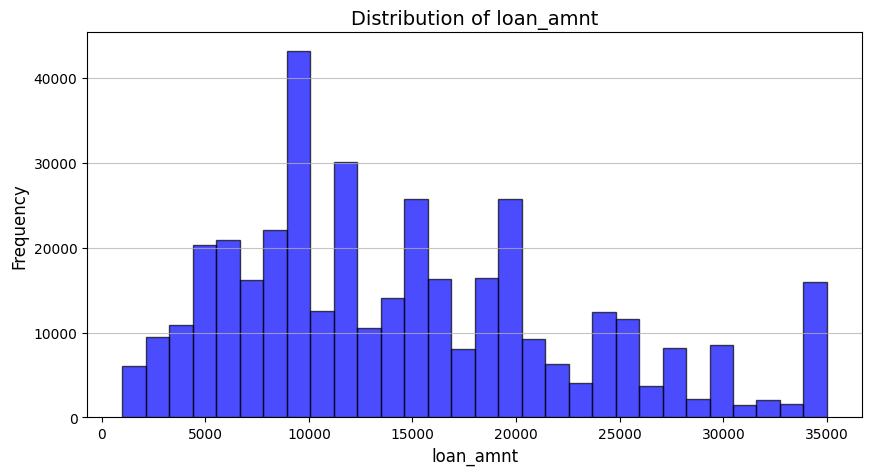

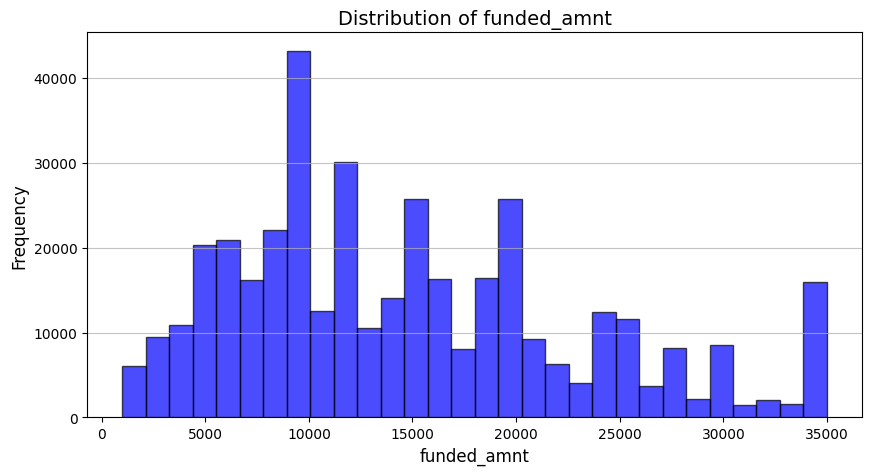

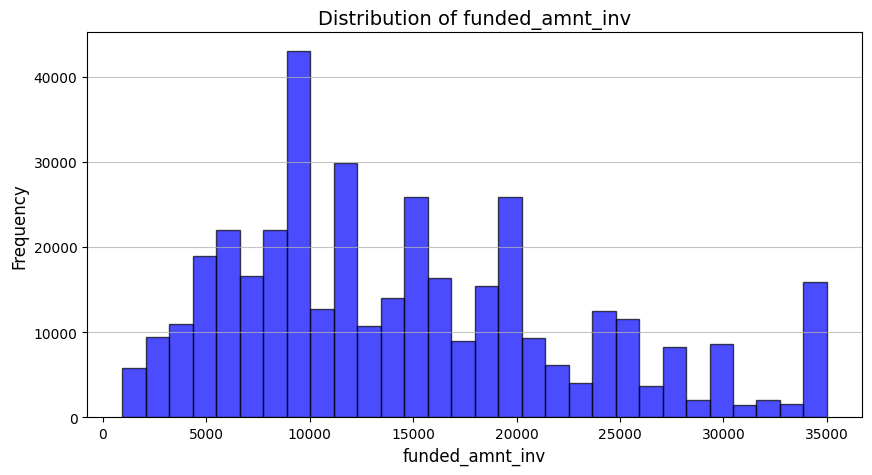

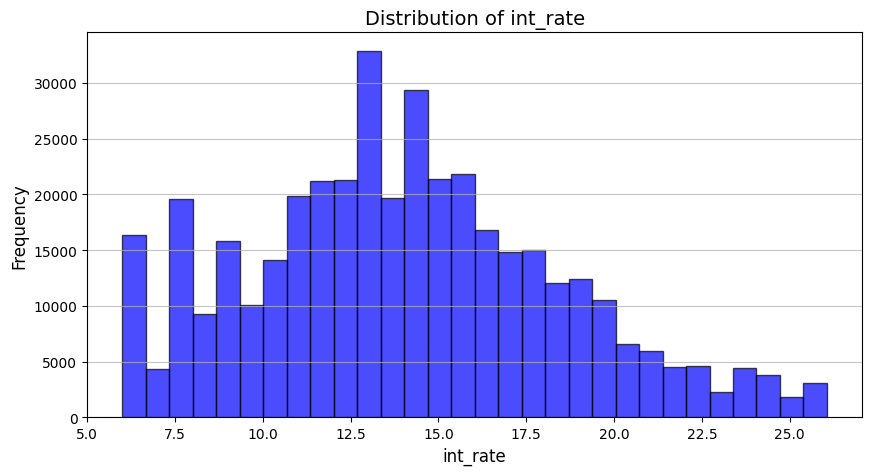

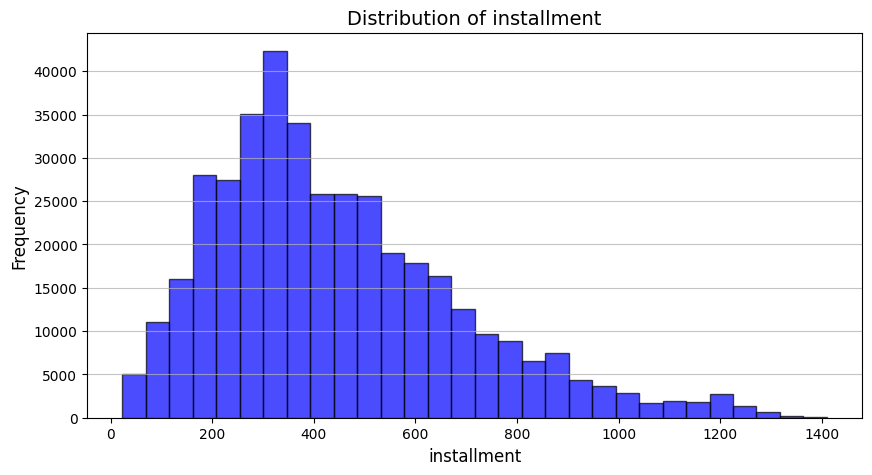

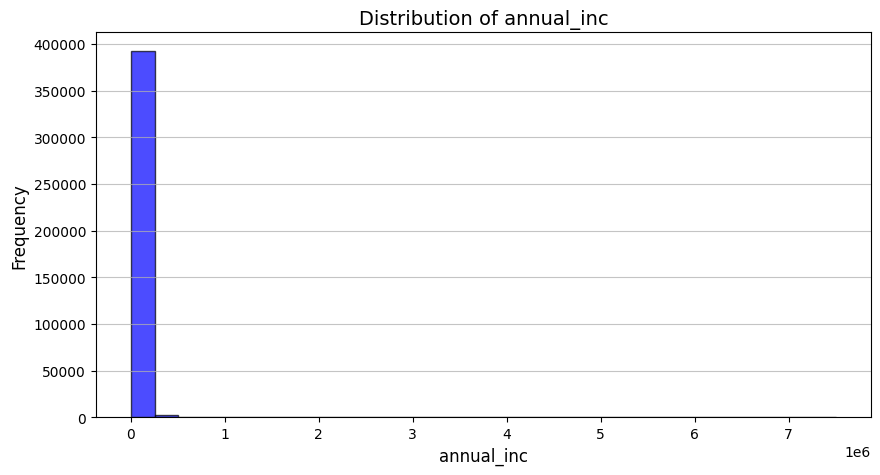

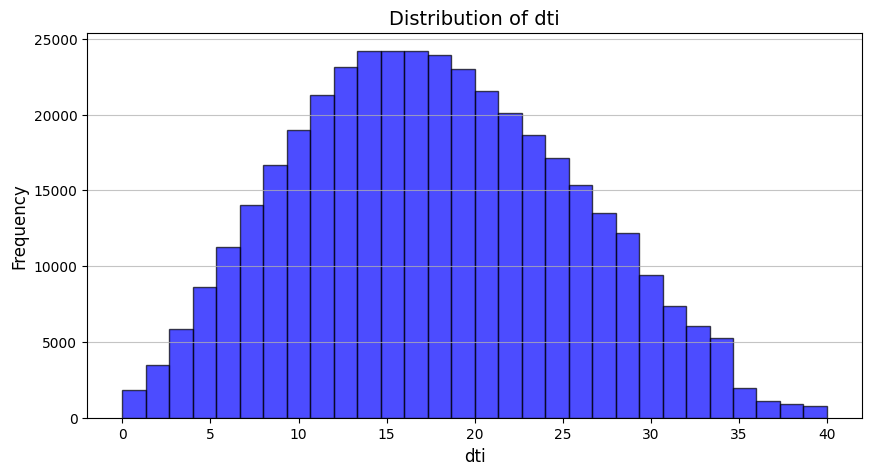

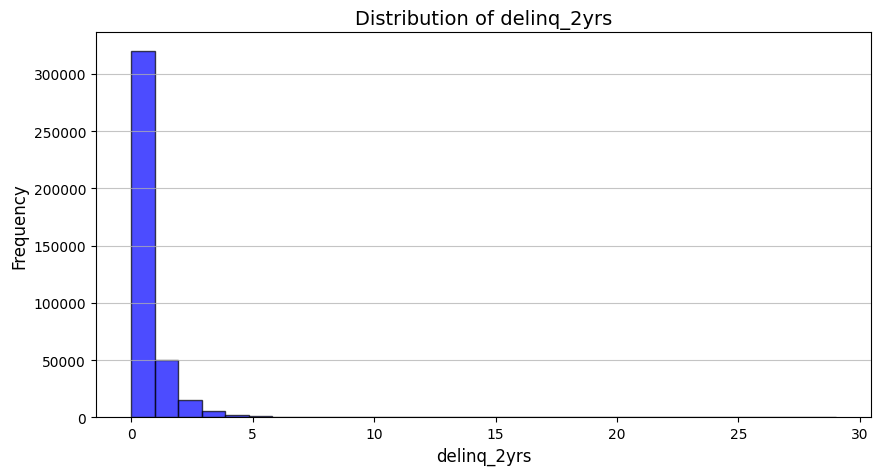

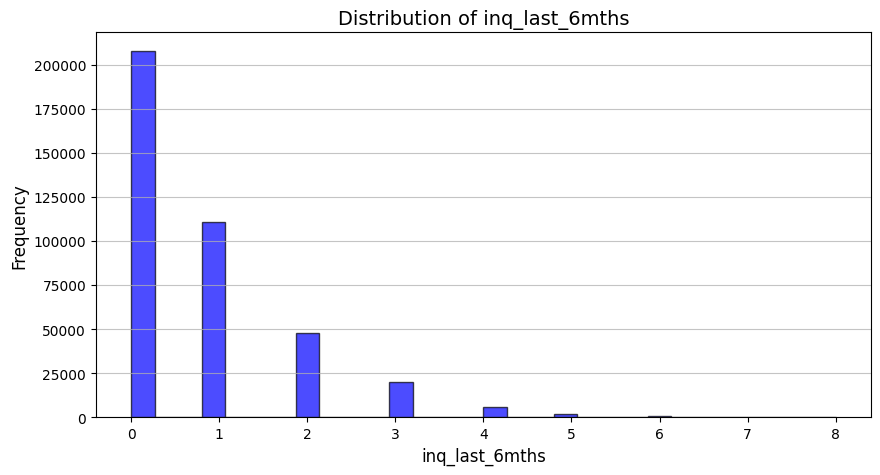

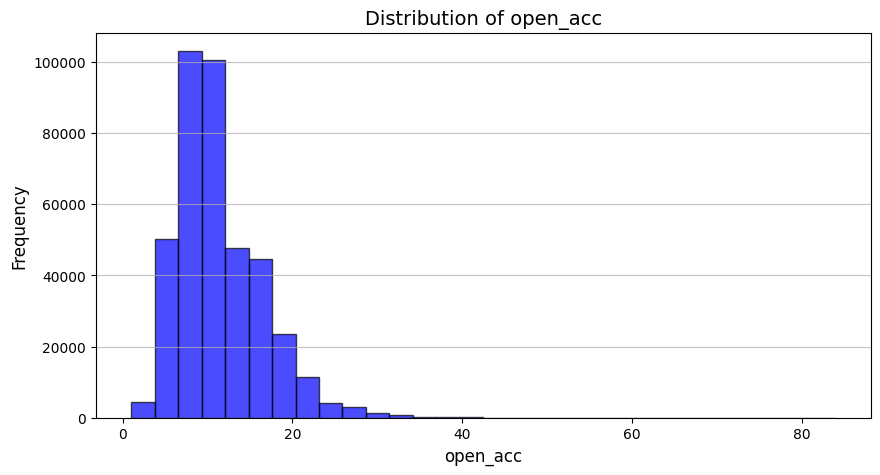

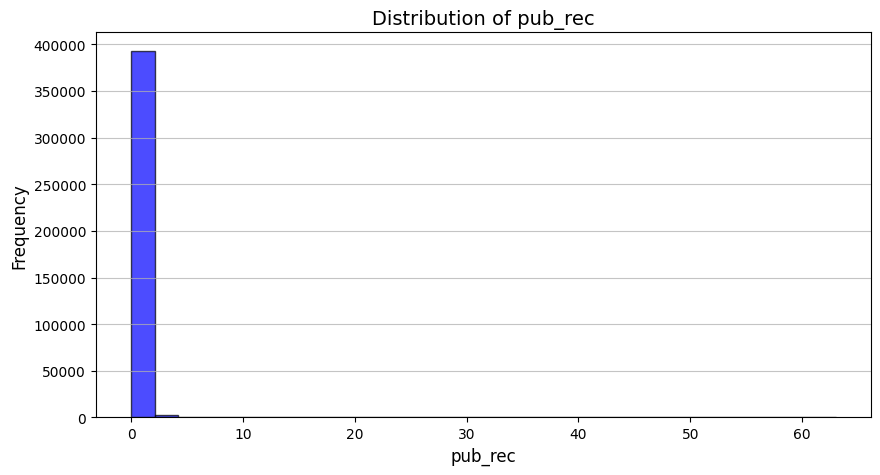

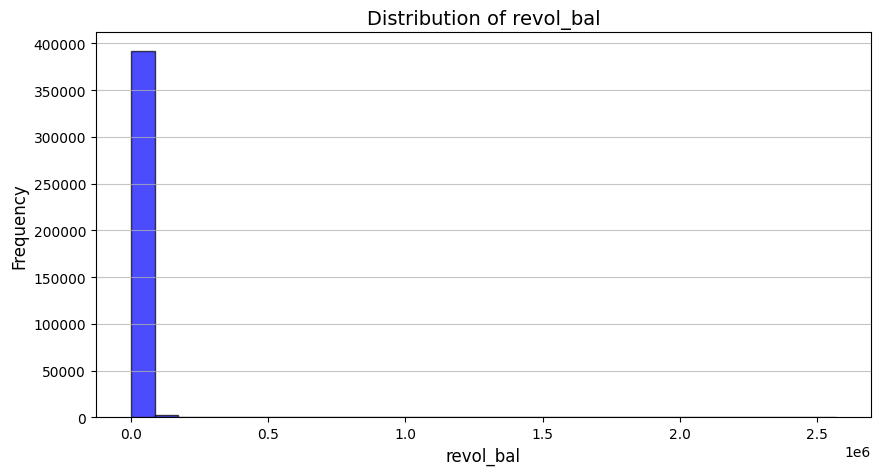

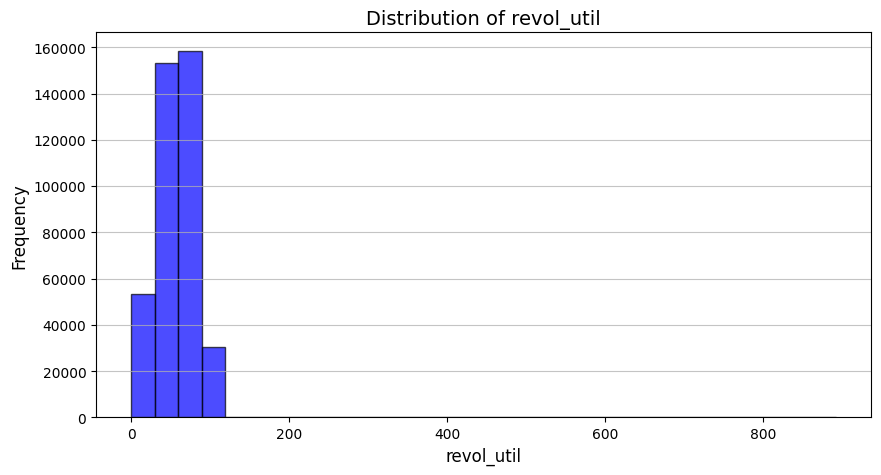

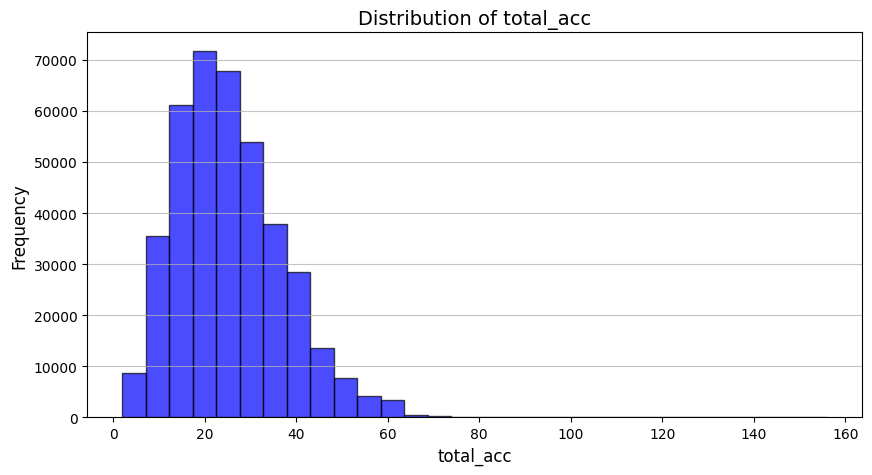

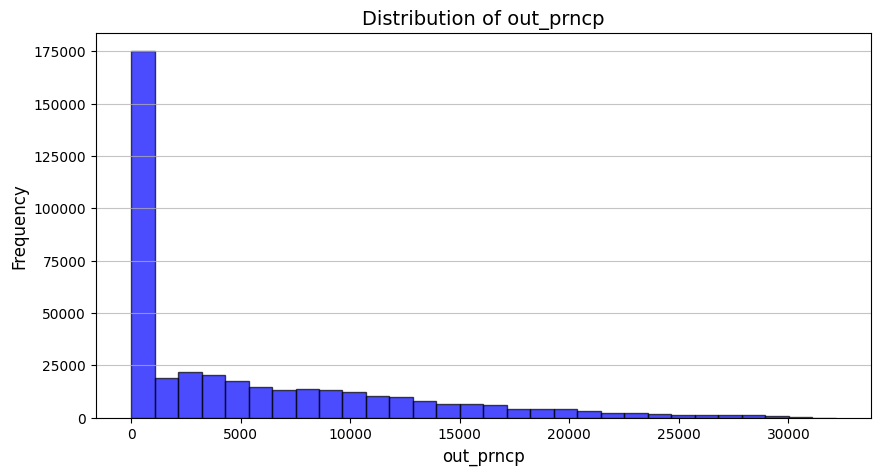

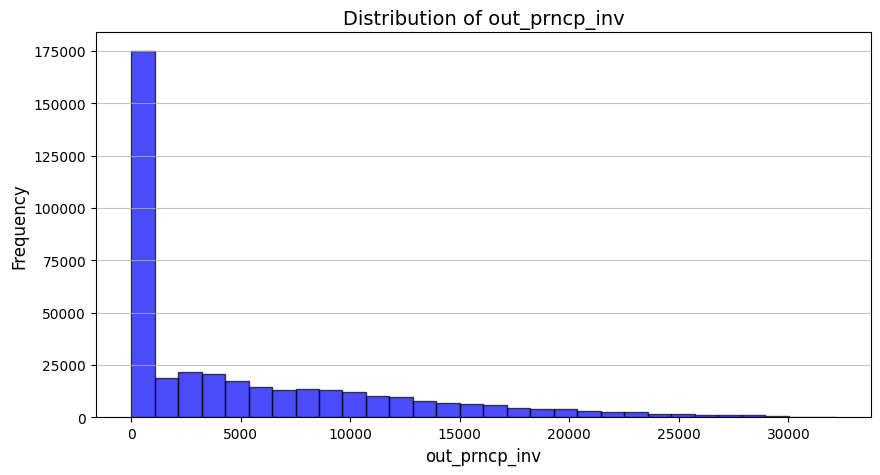

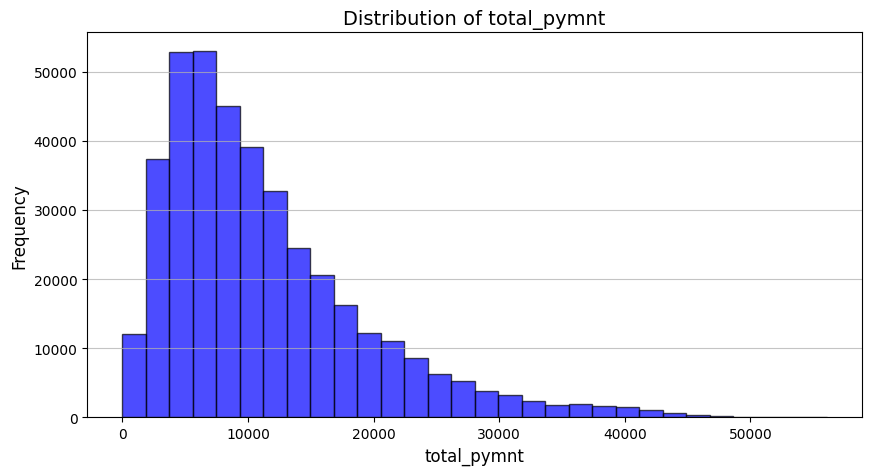

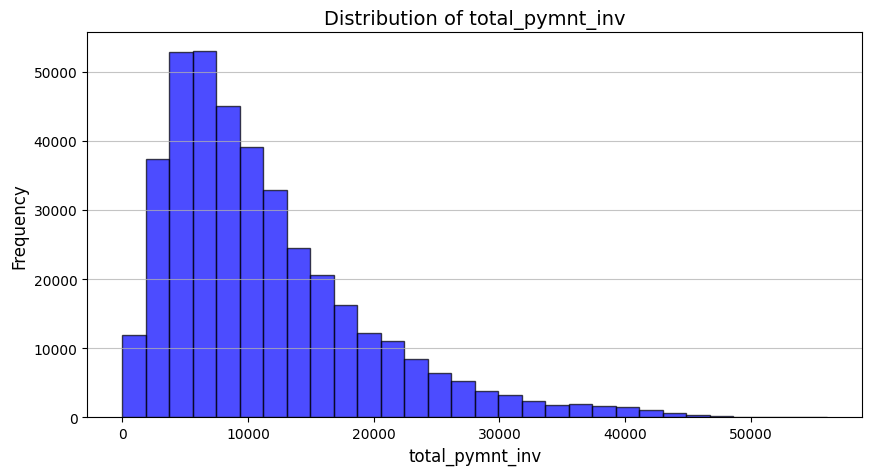

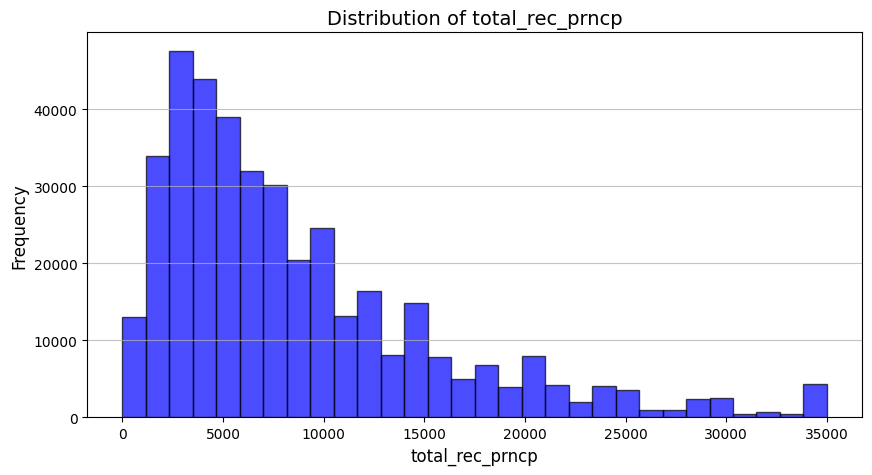

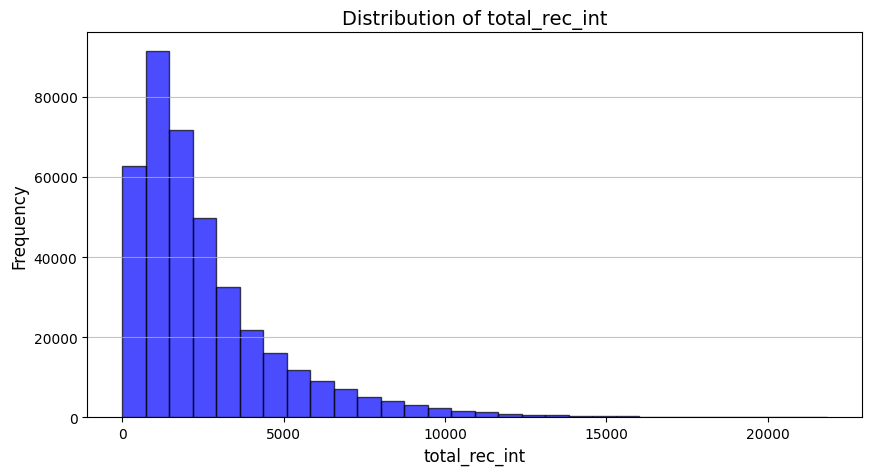

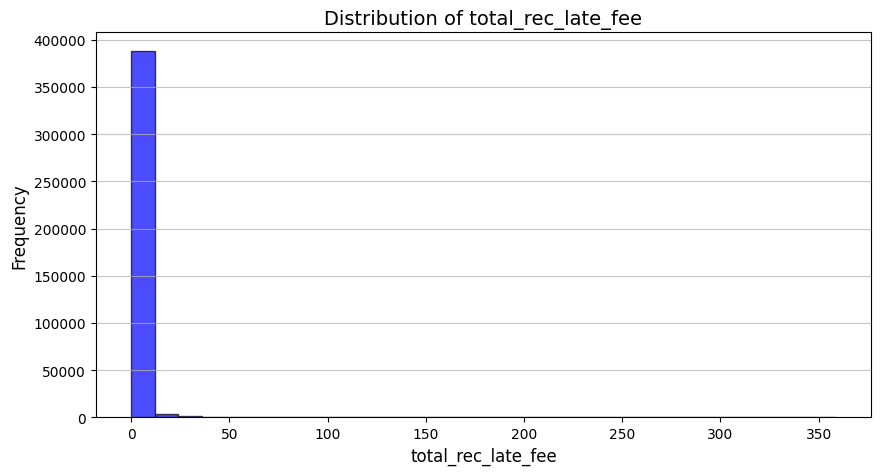

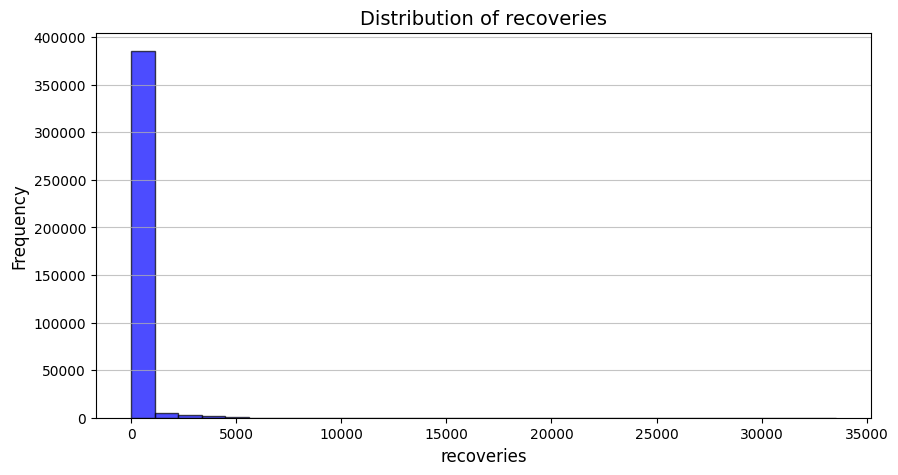

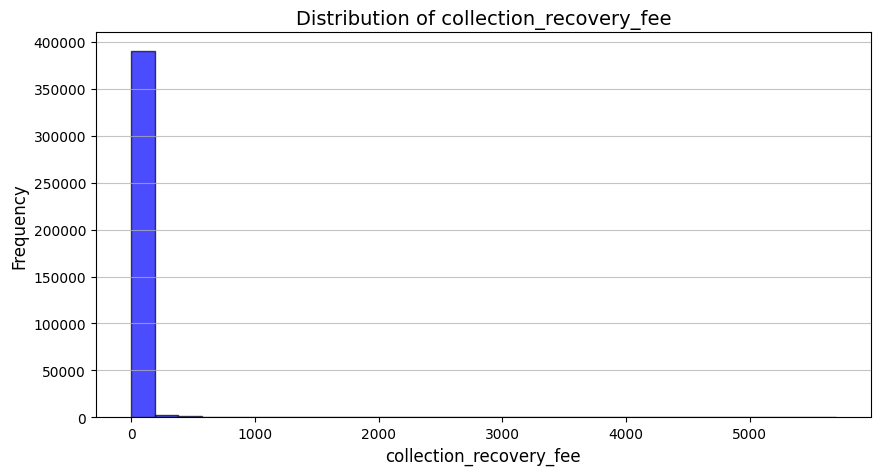

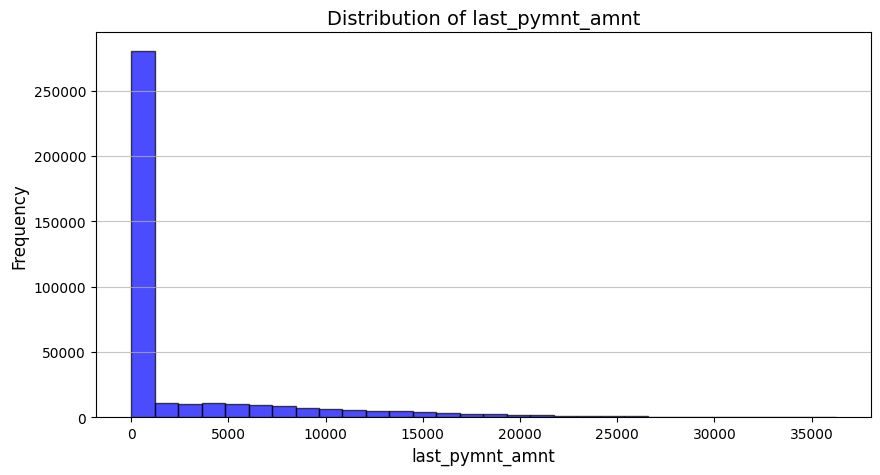

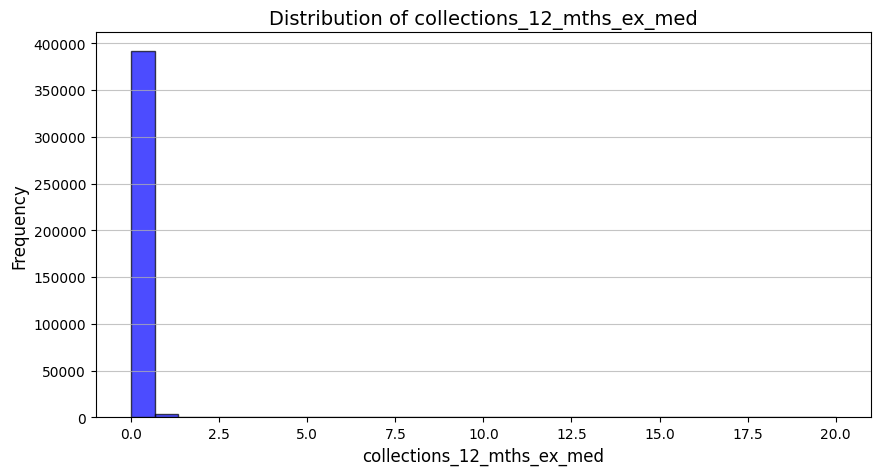

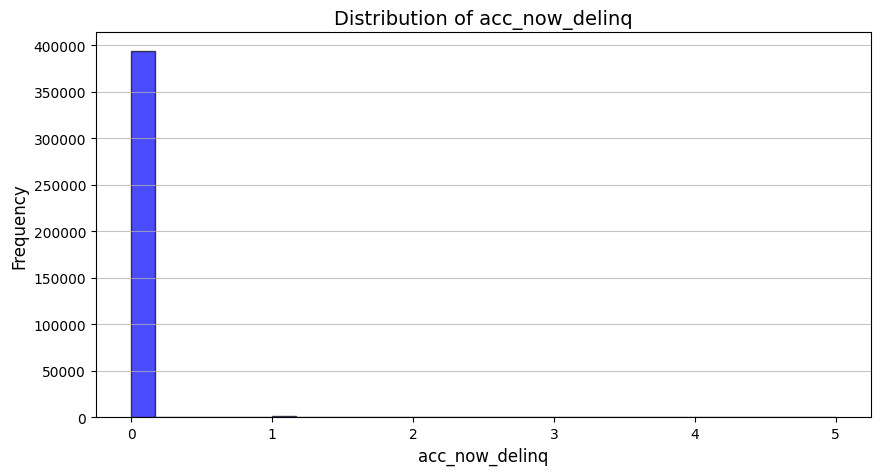

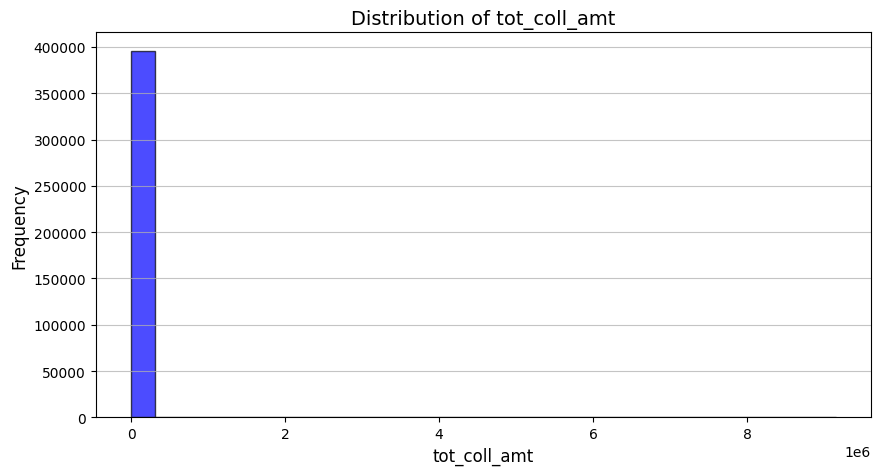

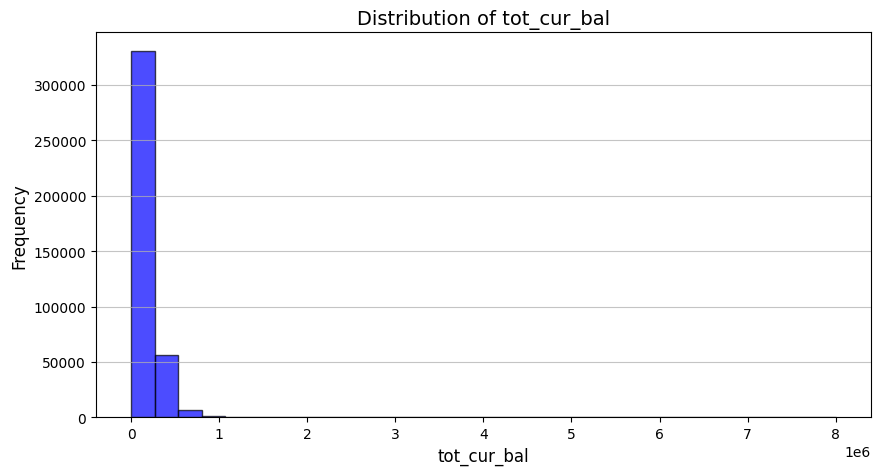

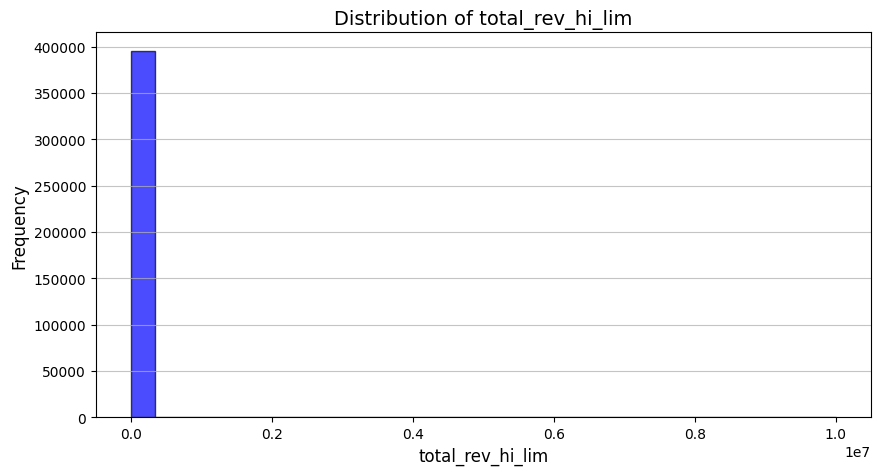

In [91]:
# Perulangan untuk membuat histogram untuk setiap kolom di numeric_columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df_cleaned[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Data Preparation

**Feature Encoding**

Pertama mari kita merubah value dari fitur target dari yang sebelumnya object menjadi tipe data numeric, berdasarkan domain knowledge. Berikut ini adalah value yang termasuk default (1 / beresiko gagal bayar) dan non-default (0 / tidak beresiko gagal bayar)

- 0 : Current, Fully Paid
- 1 : Late (31-120 days), Late (16-30 days), Charged Off, In Grace Period, Default

In [92]:
df_cleaned['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default'], dtype=object)

In [93]:
df_model = df_cleaned.copy()

In [94]:
# Daftar kategori yang dianggap sebagai default
default_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']

# Ubah nilai kolom loan_status menjadi biner
df_model['loan_status'] = df_model['loan_status'].apply(
    lambda x: 1 if x in default_status else 0
)

# Tampilkan hasil transformasi
df_model['loan_status'].value_counts()

loan_status
0    351500
1     44290
Name: count, dtype: int64

Terlihat bahwa data yang kita miliki sangat tidak seimbang yang dimana data non-default sangat mendominasi

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `grade` menjadi integer 0-6 dengan Ordinal Encoding, karena fitur ini adalah tingkat pinjaman yang telah ditetapkan.
2. Merubah fitur/kolom `sub_grade` menjadi integer 0-34 dengan Ordinal Encoding, karena fitur ini adalah tingkat pinjaman yang telah ditetapkan tetapi lebih spesifik.
3. Merubah fitur/kolom `emp_length` menjadi integer 0-10 dengan Ordinal Encoding, karena fitur ini adalah lama kerja peminjam.
4. Merubah fitur/kolom `home_ownership` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `verification_status` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `purpose` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `term` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
8. Merubah fitur/kolom `pymnt_plan` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
9. Merubah fitur/kolom `initial_list_status` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
10. Merubah fitur/kolom `addr_state` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja. 

In [95]:
ordinal_mapping = [
    {'col':'grade',
    'mapping':{
        'A' :   0,
        'B' :   1, 
        'C' :   2,  
        'D' :   3, 
        'E' :   4, 
        'F' :   5, 
        'G' :   6
    }},

    {'col':'sub_grade',
    'mapping':{
        'A1'    :   0,
        'A2'    :   1,
        'A3'    :   2,
        'A4'    :   3,
        'A5'    :   4,
        'B1'    :   5,
        'B2'    :   6,
        'B3'    :   7,
        'B4'    :   8,
        'B5'    :   9,
        'C1'    :   10, 
        'C2'    :   11,
        'C3'    :   12,
        'C4'    :   13,
        'C5'    :   14,
        'D1'    :   15,
        'D2'    :   16,
        'D3'    :   17, 
        'D4'    :   18,
        'D5'    :   19,
        'E1'    :   20,
        'E2'    :   21,
        'E3'    :   22, 
        'E4'    :   23,
        'E5'    :   24, 
        'F1'    :   25, 
        'F2'    :   26,
        'F3'    :   27,
        'F4'    :   28,
        'F5'    :   29,
        'G1'    :   30,
        'G2'    :   31,
        'G3'    :   32,
        'G4'    :   33,
        'G5'    :   34
    }},

    {'col':'emp_length',
    'mapping':{
        '< 1 year'      :   0,
        '1 year'        :   1, 
        '2 years'       :   2, 
        '3 years'       :   3,
        '4 years'       :   4, 
        '5 years'       :   5,
        '6 years'       :   6,
        '7 years'       :   7,
        '8 years'       :   8,
        '9 years'       :   9, 
        '10+ years'     :   10   
    }}
]

In [96]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['home_ownership', 'verification_status', 'purpose', 'term', 'pymnt_plan', 'initial_list_status', ]),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['grade', 'sub_grade', 'emp_length']),
    ('binary', ce.BinaryEncoder(), ['addr_state'])
], remainder='passthrough')

**Splitting Data**

In [97]:
x = df_model.drop(columns=['loan_status'])
y = df_model['loan_status']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [99]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__home_ownership_NONE,onehot__home_ownership_OTHER,onehot__home_ownership_OWN,onehot__home_ownership_RENT,onehot__verification_status_Source Verified,onehot__verification_status_Verified,onehot__purpose_credit_card,onehot__purpose_debt_consolidation,onehot__purpose_home_improvement,onehot__purpose_house,onehot__purpose_major_purchase,onehot__purpose_medical,onehot__purpose_moving,onehot__purpose_other,onehot__purpose_renewable_energy,onehot__purpose_small_business,onehot__purpose_vacation,onehot__purpose_wedding,onehot__term_ 60 months,onehot__pymnt_plan_y,onehot__initial_list_status_w,ordinal__grade,ordinal__sub_grade,ordinal__emp_length,binary__addr_state_0,binary__addr_state_1,binary__addr_state_2,binary__addr_state_3,binary__addr_state_4,binary__addr_state_5,remainder__loan_amnt,remainder__funded_amnt,remainder__funded_amnt_inv,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__dti,remainder__delinq_2yrs,remainder__inq_last_6mths,remainder__open_acc,remainder__pub_rec,remainder__revol_bal,remainder__revol_util,remainder__total_acc,remainder__out_prncp,remainder__out_prncp_inv,remainder__total_pymnt,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq,remainder__tot_coll_amt,remainder__tot_cur_bal,remainder__total_rev_hi_lim
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,10075.0,10075.0,10075.0,14.99,349.21,60000.0,26.44,2.0,0.0,17.0,0.0,30738.0,58.1,34.0,0.00,0.00,4584.63000,4584.63,2113.63,1029.26,0.0,1441.74,259.5132,349.21,0.0,0.0,0.0,74458.0,52900.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,10750.0,10750.0,10750.0,15.61,375.88,60000.0,13.10,0.0,1.0,17.0,0.0,6569.0,45.6,30.0,0.00,0.00,11662.82256,11662.82,10750.00,912.82,0.0,0.00,0.0000,9407.98,0.0,0.0,2851.0,258663.0,14400.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,5600.0,5600.0,5600.0,17.27,200.41,37600.0,22.50,3.0,1.0,6.0,0.0,4673.0,91.6,19.0,0.00,0.00,5807.45000,5807.45,4271.71,1535.74,0.0,0.00,0.0000,200.41,0.0,0.0,0.0,8982.0,5100.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,12000.0,12000.0,12000.0,11.14,393.67,41080.0,22.23,0.0,0.0,7.0,0.0,27343.0,84.7,14.0,776.37,776.37,13384.45000,13384.45,11223.63,2160.82,0.0,0.00,0.0000,393.67,0.0,0.0,0.0,27343.0,32300.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4875.0,4875.0,4875.0,23.43,189.81,15468.0,38.17,0.0,1.0,13.0,0.0,13289.0,81.0,14.0,3244.20,3244.20,2847.15000,2847.15,1630.80,1216.35,0.0,0.00,0.0000,189.81,0.0,0.0,0.0,13289.0,16400.0


## Modeling

### Model Benchmarking : K-Fold

In [100]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lgbm = lgb.LGBMClassifier()

# Scaling data
scaler = StandardScaler()

In [101]:
models = [knn,dt,rf,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['KNN', 'Decision Tree', 'Random Forest','LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 28345, number of negative: 224960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5839
[LightGBM] [Info] Number of data points in the train set: 253305, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111901 -> initscore=-2.071472
[LightGBM] [Info] Start training from score -2.071472
[LightGBM] [Info] Number of positive: 28345, number of negative: 224960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5841
[LightGBM] [Info] Number of data points in the train set: 253305, number of used features: 58
[LightGBM] [In

,mean roc_auc,sdev
model,,
LightGBM,0.957451,0.000994
Random Forest,0.950996,0.001440
Decision Tree,0.877495,0.002564
KNN,0.798305,0.001557


Terlihat bahwa model LightGBM adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter

### Model Benchmarking : Test Data

In [102]:
# Test data benchmarking
score_roc_auc = []

def y_pred_func(i):
    # Membuat pipeline dengan transformer dan model
    estimator = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    # Fit model pada training data
    estimator.fit(x_train, y_train)
    # Prediksi pada test data
    y_pred = estimator.predict(x_test)
    # Probabilitas prediksi untuk ROC AUC
    y_pred_proba = estimator.predict_proba(x_test)[:, 1]
    return estimator, y_pred, y_pred_proba

# Iterasi untuk setiap model dan evaluasi pada test data
for i, j in zip(models, ['KNN', 'Decision Tree', 'Random Forest','LightGBM']):
    try:
        # Mendapatkan hasil prediksi
        estimator, y_pred, y_pred_proba = y_pred_func(i)
        # Hitung ROC AUC score
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        score_roc_auc.append(roc_auc)
        # Tampilkan classification report
        print(f"{j}\n", classification_report(y_test, y_pred))
    except Exception as e:
        # Jika terjadi error, tambahkan None dan cetak error
        print(f"Error on model {j}: {e}")
        score_roc_auc.append(None)

# Hasil ROC AUC dalam DataFrame
test_results = pd.DataFrame({
    'model': ['KNN', 'Decision Tree', 'Random Forest','LightGBM'],
    'roc_auc score': score_roc_auc
}).set_index('model').sort_values(by='roc_auc score', ascending=False)

KNN
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     70300
           1       0.91      0.40      0.55      8858

    accuracy                           0.93     79158
   macro avg       0.92      0.70      0.76     79158
weighted avg       0.93      0.93      0.92     79158

Decision Tree
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     70300
           1       0.75      0.78      0.77      8858

    accuracy                           0.95     79158
   macro avg       0.86      0.88      0.87     79158
weighted avg       0.95      0.95      0.95     79158

Random Forest
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     70300
           1       0.99      0.74      0.85      8858

    accuracy                           0.97     79158
   macro avg       0.98      0.87      0.92     79158
weighted avg       0.97      0.97      

In [103]:
print("\nTest Data Results:")
test_results


Test Data Results:


,roc_auc score
model,
LightGBM,0.957913
Random Forest,0.950749
Decision Tree,0.875549
KNN,0.796476


Terlihat kembali lagi model LightGBM adalah yang terbaik performanya pada test data.

Mari sekarang kita coba melakukan oversampling untuk model LightGBM kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.

### Test Oversampling with K-Fold Cross Validation

In [104]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [105]:
from sklearn.model_selection import StratifiedKFold

K = 5
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [106]:
data = x_train
target = y_train

In [107]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 28345, number of negative: 224960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5842
[LightGBM] [Info] Number of data points in the train set: 253305, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111901 -> initscore=-2.071472
[LightGBM] [Info] Start training from score -2.071472
[LightGBM] [Info] Number of positive: 224960, number of negative: 224960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5834
[LightGBM] [Info] Number of data points in the train set: 449920, number of used features: 59
[LightGBM] [I

#### Evaluation Metrics Without Oversampling

In [108]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.973526,0.972429,0.968955,0.959346,0.925884,0.922875,0.767543,0.763370,0.994651,0.987406
1,0.973321,0.972081,0.968509,0.958615,0.925246,0.921625,0.765779,0.758290,0.994548,0.989869
2,0.973404,0.972065,0.969136,0.956940,0.925466,0.921408,0.765963,0.756139,0.995278,0.992406
3,0.973735,0.971686,0.968778,0.957277,0.926516,0.920341,0.769068,0.754445,0.995116,0.990183
4,0.973451,0.972760,0.968396,0.958125,0.925618,0.923786,0.766422,0.764747,0.995236,0.989410
Average,0.973487,0.972204,0.968755,0.958061,0.925746,0.922007,0.766955,0.759398,0.994966,0.989855


#### Evaluation Metrics With Oversampling

In [109]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.902312,0.963712,0.970985,0.959063,0.901649,0.906546,0.820257,0.811345,0.981297,0.856802
1,0.903361,0.963807,0.970719,0.958027,0.902725,0.906457,0.822506,0.807817,0.981170,0.860255
2,0.901836,0.963585,0.970583,0.956771,0.901168,0.905764,0.819603,0.805532,0.980932,0.860157
3,0.902118,0.963348,0.971270,0.957076,0.901452,0.905072,0.819901,0.803556,0.981252,0.859731
4,0.902318,0.963948,0.970600,0.957861,0.901667,0.907374,0.820950,0.815128,0.980515,0.855830
Average,0.902389,0.963680,0.970831,0.957760,0.901732,0.906243,0.820644,0.808676,0.981033,0.858555


**Tanpa Oversampling**
- Akurasi rata-rata tinggi (97.4%), yang menunjukkan bahwa model dapat memprediksi mayoritas kelas dengan sangat baik
- Precision rata-rata tinggi (~99.0%), menunjukkan bahwa ketika model memprediksi default, kemungkinan besar prediksi itu benar
- Recall untuk kelas default rendah (~78.5%), menunjukkan bahwa model gagal menangkap sebagian besar kasus default
- F1-score lebih rendah (~92.8%) karena recall yang buruk

**Dengan Oversampling**
- recall rata-rata meningkat secara signifikan dari ~78.5% menjadi ~83.2%, menunjukkan bahwa model lebih baik dalam mendeteksi kasus default
- F1-score juga meningkat dari ~92.8% menjadi ~91.37%, mencerminkan keseimbangan yang lebih baik antara precision dan recall
- ROC AUC tetap konsisten tinggi (~97.4%), menunjukkan bahwa model mampu membedakan dengan baik antara default dan non-default

**Kesimpulan**

Tanpa oversampling, model cenderung lebih fokus pada kelas mayoritas (non-default), sehingga kurang efektif dalam menangani kasus default. Sedangkan dengan oversampling, model menjadi lebih baik dalam menangkap kasus default (recall meningkat), meskipun precision sedikit menurun

In [110]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56240
           1       0.99      0.76      0.86      7087

    accuracy                           0.97     63327
   macro avg       0.98      0.88      0.92     63327
weighted avg       0.97      0.97      0.97     63327

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56240
           1       0.99      0.76      0.86      7087

    accuracy                           0.97     63327
   macro avg       0.98      0.88      0.92     63327
weighted avg       0.97      0.97      0.97     63327

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56240
           1       0.99      0.76      0.86      7086

    accuracy                           0.97     63326
   macro avg       0.98      0.88      0.92     63326
weighted avg       0.97      0.97      0.97     63326

              preci

In [111]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56240
           1       0.86      0.81      0.83      7087

    accuracy                           0.96     63327
   macro avg       0.92      0.90      0.91     63327
weighted avg       0.96      0.96      0.96     63327

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56240
           1       0.86      0.81      0.83      7087

    accuracy                           0.96     63327
   macro avg       0.92      0.90      0.91     63327
weighted avg       0.96      0.96      0.96     63327

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56240
           1       0.86      0.81      0.83      7086

    accuracy                           0.96     63326
   macro avg       0.92      0.89      0.91     63326
weighted avg       0.96      0.96      0.96     63326

              preci

Kesimpulan Tanpa Oversampling:

- Model cenderung bias ke kelas mayoritas.
- Precision sangat tinggi, tetapi recall rendah, artinya model kurang efektif dalam menangkap semua kasus default.

Kesimpulan Dengan Oversampling:

- Model menjadi lebih seimbang dalam menangkap kelas minoritas (default).
- Recall meningkat, sehingga lebih banyak kasus default dapat dikenali, meskipun precision sedikit menurun.

Sekarang mari kita coba melakukan hyperparameter tuning pada model LightGBM kita untuk mendapatkan hasil yang lebih baik lagi.

### Hyperparameter Tuning

In [112]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('scaler', scaler),
    ('model',lgbm)
])

In [132]:
hyperparam_space = [{
    'model__max_bin': [215, 217, 220, 223, 225],
    'model__num_leaves': [35, 40, 45, 50, 55],
    'model__min_data_in_leaf': [22, 23, 24, 25],
    'model__num_iterations': [240, 245, 250, 255],
    'model__learning_rate': [0.1, 0.125, 0.15, 0.2],
    'model__random_state': [42]
}]

default hyperparameter LGBM => `max_bin` = 215, `num_leaves` = 35, `min_data_in_leaf` = 22, `num_iterations` = 240, `learning_rate` = 0.1

In [133]:
random_search = RandomizedSearchCV(estimator, n_jobs=-1, param_distributions=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [134]:
random_search.fit(x_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 281200, number of negative: 281200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5104
[LightGBM] [Info] Number of data points in the train set: 562400, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.9605311996513514
{'model__random_state': 42, 'model__num_leaves': 50, 'model__num_iterations': 255, 'model__min_data_in_leaf': 24, 'model__max_bin': 220, 'model__learning_rate': 0.1}


Hyperparameter terbaik LGBM dari hasil Randomsearch => 
- `max_bin` = 220
- `num_leaves` = 50
- `min_data_in_leaf` = 24
- `num_iterations` = 255
- `learning_rate` = 0.1

In [135]:
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 281200, number of negative: 281200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5104
[LightGBM] [Info] Number of data points in the train set: 562400, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['home_ownership',
                                                   'verification_status',
                                                   'purpose', 'term',
                                                   'pymnt_plan',
                                                   'initial_list_status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'grade',
                                                                           'data_...
                                                                          {'col': 'emp_length',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': < 1 year      0
1 year        1
2 years       2
3 years       3
4 years       4
5 years       5
6 years       6
7 years       7
8 years       8
9 years       9
10+ years    10
dtype: int64}]),
                                                  ['grade', 'sub_grade',
                                                   'emp_length']),
                                                 ('binary', BinaryEncoder(),
                                                  ['addr_state'])])),
                ('scaler', StandardScaler()),
                ('model',
                 LGBMClassifier(max_bin=220, min_data_in_leaf=24,
                                num_iterations=255, num_leaves=50,
                                random_state=42))])

In [136]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('scaler', scaler),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 281200, number of negative: 281200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5835
[LightGBM] [Info] Number of data points in the train set: 562400, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['home_ownership',
                                                   'verification_status',
                                                   'purpose', 'term',
                                                   'pymnt_plan',
                                                   'initial_list_status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'grade',
                                                                           'data_...
E2    21
E3    22
E4    23
E5    24
F1    25
F2    26
F3    27
F4    28
F5    29
G1    30
G2    31
G3    32
G4    33
G5    34
dtype: int64},
                                                                          {'col': 'emp_length',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': < 1 year      0
1 year        1
2 years       2
3 years       3
4 years       4
5 years       5
6 years       6
7 years       7
8 years       8
9 years       9
10+ years    10
dtype: int64}]),
                                                  ['grade', 'sub_grade',
                                                   'emp_length']),
                                                 ('binary', BinaryEncoder(),
                                                  ['addr_state'])])),
                ('scaler', StandardScaler()), ('model', LGBMClassifier())])

In [140]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
ROC AUC Score Default LGBM :  0.9573863521398309
ROC AUC Score Tuned LGBM :  0.9611310684429246


Terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki nilai ROC AUC yang lebih baik walaupun hanya naik sedikit saja.

Mari kita lihat juga perbandingan classification reportnya

In [141]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     70300
           1       0.85      0.81      0.83      8858

    accuracy                           0.96     79158
   macro avg       0.91      0.89      0.90     79158
weighted avg       0.96      0.96      0.96     79158

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     70300
           1       0.87      0.81      0.84      8858

    accuracy                           0.97     79158
   macro avg       0.92      0.90      0.91     79158
weighted avg       0.96      0.97      0.96     79158



Kembali lagi terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model LGBM yang sudah di tuned sebagai model akhir kita.

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LGBM kita

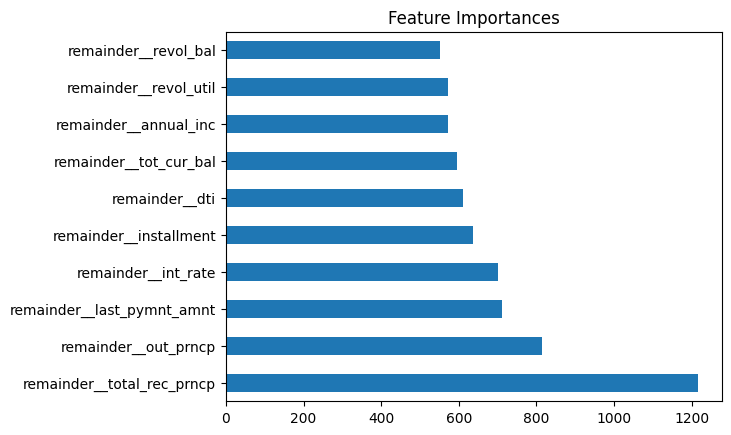

In [142]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model LGBM kita, fitur/kolom total_rec_prncp adalah yang paling penting, kemudian diikuti dengan out_prncp, dti, dan selanjutnya.

## Conclusion & Recommendation

In [143]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     70300
           1       0.87      0.81      0.84      8858

    accuracy                           0.97     79158
   macro avg       0.92      0.90      0.91     79158
weighted avg       0.96      0.97      0.96     79158



Berdasarkan hasil evaluasi, model prediksi yang telah dikembangkan memiliki performa yang sangat baik dengan recall untuk mendeteksi default sebesar 81%. Hal ini menunjukkan bahwa model mampu mengidentifikasi sebagian besar peminjam yang berpotensi gagal bayar, meskipun masih ada risiko 19% peminjam default yang tidak terdeteksi. Dengan precision sebesar 87% pada kelas default, model juga menunjukkan tingkat akurasi yang tinggi dalam mengidentifikasi peminjam yang benar-benar berisiko, meskipun terdapat beberapa false positives yang dapat menyebabkan penyaringan yang terlalu ketat. Implementasi model ini dapat membantu perusahaan dalam proses penyaringan dalam menentukan peminjam yang akan diterima.

#### Recommendation

- Tambahkan fitur-fitur baru yang dapat memengaruhi prediksi, seperti riwayat pekerjaan peminjam, pola pengeluaran bulanan, atau data eksternal seperti kondisi ekonomi wilayah tempat peminjam tinggal.
- Gunakan model sebagai sistem rekomendasi awal untuk menyaring aplikasi kredit. Aplikasi dengan risiko default tinggi bisa melalui evaluasi tambahan oleh analis manusia.
- Implementasikan model ke dalam proses bisnis untuk menilai dampaknya terhadap efisiensi pengambilan keputusan kredit.